In [1]:
# import libraries
import sys
import statsbombpy
from statsbombpy import sb
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import os, json
import numpy as np
from pitch_official import draw_pitch
import matplotsoccer
import scipy.ndimage
from matplotlib.patches import Arc

# Display options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 3000

# Display options for numpy
np.set_printoptions(linewidth=120, suppress=True)

# Display options for pyplot
%config InlineBackend.figure_format = 'retina'

## Cell computation timer
%load_ext autotime

import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from mplsoccer import VerticalPitch, Pitch
from mplsoccer.cm import create_transparent_cmap
from mplsoccer.scatterutils import arrowhead_marker

from mplsoccer import VerticalPitch, add_image, FontManager
from mplsoccer.statsbomb import read_event, EVENT_SLUG


# Declaring credentials
credentials={'user':'vignesh.jayanth@staderennais.fr','passwd':'7XtHANc7'}

time: 623 ms (started: 2021-10-15 11:55:41 +02:00)


In [49]:
filename2 = '/Users/vignesh.jayanth/Documents/Trial-Data Exports 2021/France_Ligue_1_2021_2022.h5'

key='df'

df=pd.read_hdf(filename2,key)

time: 1min 21s (started: 2021-10-14 16:35:28 +02:00)


## Only interested in this seasons games ##

In [50]:
df=df.sort_values(by=['match_id','index'], ascending=False).reset_index(drop=True)

time: 3.54 s (started: 2021-10-14 16:36:49 +02:00)


In [56]:


# Choose Team of Choice for analysis- Rennes- all match ids #

#Rennes_matches=df[df['team']=='Rennes'][['match_id']]
#Rennes_matches=list(Rennes_matches.match_id.unique())

# Subset the data #

df1=df[df['match_id']==3802922].reset_index(drop=True)

# Check Subsitution #

Subs=df1[['minute','second','substitution_replacement','type','team']]
Subs=Subs[Subs['type']=='Substitution'].reset_index(drop=True)
Subs


minute  second substitution_replacement          type    team
0      91      29         Stéphane Bahoken  Substitution  Angers
1      81      22              Lovro Majer  Substitution  Rennes
2      75      36          Azzedine Ounahi  Substitution  Angers
3      75      34         Pierrick Capelle  Substitution  Angers
4      72      10      Romain Del Castillo  Substitution  Rennes
5      45       0        Eduardo Camavinga  Substitution  Rennes
6      45       0          Serhou Guirassy  Substitution  Rennes
7      45       0             Warmed Omari  Substitution  Rennes

time: 30.9 ms (started: 2021-10-14 17:11:33 +02:00)


In [54]:
df1.type.unique()

array(['Half End', 'Ball Receipt*', 'Pass', 'Carry', 'Pressure', 'Ball Recovery', 'Substitution', 'Goal Keeper',
       'Shot', 'Miscontrol', 'Dribble', 'Dribbled Past', 'Foul Won', 'Foul Committed', 'Duel', 'Dispossessed',
       'Interception', 'Block', 'Clearance', 'Injury Stoppage', 'Shield', 'Tactical Shift', '50/50', 'Error',
       'Half Start', 'Offside', 'Starting XI'], dtype=object)

time: 2.93 ms (started: 2021-10-14 17:10:28 +02:00)


In [52]:
spike_cols = [col for col in df2.columns if 'sec' in col]
print(spike_cols)

['second']
time: 692 µs (started: 2021-10-14 17:09:43 +02:00)


In [ ]:
# Check for HNL League
Comps=pd.DataFrame(sb.competitions(fmt="dict",creds=credentials)).T.reset_index(drop=True)
Croatia=Comps[Comps['country_name']=='Croatia'].reset_index(drop=True)
C=pd.DataFrame(sb.matches(competition_id=78, season_id=90, fmt="dict",creds=credentials)).T.reset_index(drop=True)
B=pd.DataFrame(sb.matches(competition_id=78, season_id=42, fmt="dict",creds=credentials)).T.reset_index(drop=True)
A=B.append(C).reset_index(drop=True)

competition= pd.DataFrame(A['competition'].tolist(), index= A.index).fillna('').reset_index(drop=True)
season= pd.DataFrame(A['season'].tolist(), index= A.index).fillna('').reset_index(drop=True)
home_team= pd.DataFrame(A['home_team'].tolist(), index= A.index).fillna('').reset_index(drop=True)
away_team= pd.DataFrame(A['away_team'].tolist(), index= A.index).fillna('').reset_index(drop=True)
metadata= pd.DataFrame(A['metadata'].tolist(), index= A.index).fillna('').reset_index(drop=True)
competition_stage= pd.DataFrame(A['competition_stage'].tolist(), index= A.index).fillna('').reset_index(drop=True)
competition_stage.columns=['comp_id','comp_name']
stadium= pd.DataFrame(A['stadium'].tolist(), index= A.index).fillna('').reset_index(drop=True)
stadium.columns=['stadium_id','stadium_name','stadium_country']
stadium[['stadium_country_id','stadium_country_name']]=pd.DataFrame(stadium['stadium_country'].tolist(), index= A.index).fillna('').reset_index(drop=True)
referee= pd.DataFrame(A['referee'].tolist(), index= A.index).fillna('').reset_index(drop=True)
referee.columns=['referee_id','referee_name','referee_country']

Match_info=pd.concat([A,competition,season,home_team,away_team,metadata,competition_stage,stadium,referee], axis=1)

Match_info=Match_info.drop(['competition','season','home_team','away_team','metadata','competition_stage','stadium_country','referee_country',
          'stadium','referee'], axis=1)

Match_info=Match_info[['match_id', 'match_date','home_team_name','away_team_name']]

df3=pd.merge(df3,Match_info,on='match_id',how='left')


In [4]:
# Splitting the 50_50 column #

df2['50_50'] = df2['50_50'].fillna({i: {} for i in df2.index})  # if the column is not strings
df2 = df2.join(pd.json_normalize(df2['50_50']))

# drop 50_50
df2.drop(columns=['50_50'], inplace=True)

# Splitting the tactics column #
df2['tactics'] = df2['tactics'].fillna({i: {} for i in df2.index})  # if the column is not strings
df2 = df2.join(pd.json_normalize(df2['tactics']))

# drop tactics
df2.drop(columns=['tactics'], inplace=True)

# Splitting the location column into different Start x, Start y and Start Z columns
df2['location'] = df2['location'].fillna({i: [] for i in df2.index})  # if the column is not strings
df2[['Start_x','Start_y','Start_z']] = pd.DataFrame(df2['location'].tolist(), index= df2.index).fillna(0)

# Splitting the location column into different End x, End y and End Z columns
# Fill rows as nan if they aren't of type dict to keep it coherent

df2['pass_end_location'] = df2['pass_end_location'].fillna({i: [] for i in df2.index})  # if the column is not strings
df2['goalkeeper_end_location'] = df2['goalkeeper_end_location'].fillna({i: [] for i in df2.index})  # if the column is not strings
df2['carry_end_location'] = df2['carry_end_location'].fillna({i: [] for i in df2.index})  # if the column is not strings
df2['shot_end_location'] = df2['shot_end_location'].fillna({i: [] for i in df2.index})  # if the column is not strings

# Split the location rows in a list to dataframe #
df2[['goalkeeper_end_x','goalkeeper_end_y']] = pd.DataFrame(df2['goalkeeper_end_location'].tolist(), index= df2.index).fillna('')
df2[['pass_end_x','pass_end_y']] = pd.DataFrame(df2['pass_end_location'].tolist(), index= df2.index).fillna('')
df2[['carry_end_x','carry_end_y']] = pd.DataFrame(df2['carry_end_location'].tolist(), index= df2.index).fillna('')
df2[['shot_end_x','shot_end_y','End_z']] = pd.DataFrame(df2['shot_end_location'].tolist(), index= df2.index).fillna('')

# Combine the necessary columns into one for uniformity #
df2['End_x'] = df2[['goalkeeper_end_x','pass_end_x',
                           'carry_end_x','shot_end_x']].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
df2['End_y'] = df2[['goalkeeper_end_y','pass_end_y',
                           'carry_end_y','shot_end_y']].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

# Drop unnecessary columns #
df2=df2.drop(['goalkeeper_end_x','pass_end_x','carry_end_x','shot_end_x','goalkeeper_end_y','pass_end_y',
          'carry_end_y','shot_end_y','location','carry_end_location','goalkeeper_end_location',
          'shot_end_location','pass_end_location'], axis=1)

# Replace Blanks with np.nan's #
df2['End_x']=df2['End_x'].replace('', np.nan).fillna(0)
df2['End_y']=df2['End_y'].replace('', np.nan).fillna(0)
df2['End_x']=df2['End_x'].astype(float)
df2['End_y']=df2['End_y'].astype(float)
df2['End_y']=np.where(df2['End_y']==0,df2['Start_y'],df2['End_y'])
df2['End_x']=np.where(df2['End_x']==0,df2['Start_x'],df2['End_x'])

time: 3min 16s (started: 2021-09-29 11:38:14 +02:00)


In [5]:
dfx=df2.copy()

time: 7.25 s (started: 2021-09-29 12:00:16 +02:00)


In [6]:
# only when something goes wrong- a copy is made for such purposes
df2=dfx.copy()

time: 8.05 s (started: 2021-09-29 12:00:23 +02:00)


In [7]:
def convert_dim(df):
    df['Start_x']=df['Start_x']*0.868
    df['End_x']=df['End_x']*0.868
    df['Start_y']=df['Start_y']*0.84
    df['End_y']=df['End_y']*0.84
    
    return df

df3=convert_dim(df2)


#Assigning Proxy associated to x-axis (three Vertical zones)
bins = [0,35,71,106]
labels = ["Tiers-défensif","Tiers-Médian","Tiers-offensif"]
df3['x_zone']= pd.cut(df3['Start_x'], bins=bins, labels=labels)

#Identifying the next consecutive horizontal zones of play
df3['next_x_zone1']=df3['x_zone'].shift(-1)
df3['next_x_zone2']=df3['x_zone'].shift(-2)
df3['next_x_zone3']=df3['x_zone'].shift(-3)
df3['next_x_zone4']=df3['x_zone'].shift(-4)
df3['next_x_zone5']=df3['x_zone'].shift(-5)


#Assigning Proxy associated to the defensive and offensive box
col_1         = 'Start_x'
col_2         = 'Start_y'

conditions  = [(df3[col_1] <= 17.85) & (df3[col_2] >= 14.34) & (df3[col_2] <= 53.65),(df3[col_1] >= 87.15) & (df3[col_2] >= 14.34) & (df3[col_2] <= 53.65)]
choices     = [ "Defensive-surface", 'Offensif-surface']
    
df3["Box"] = np.select(conditions, choices, default='Open-Play')
df3["next_Box1"] = df3["Box"].shift(-1)
df3["next_Box2"] = df3["Box"].shift(-2)


#Assigning Proxy associated to y-axis (5 horizontal corridors)
bins1 = [0,14,25,43,54,68]
labels1 = ["Droit","Demi-espace Droit","Centre","Demi-espace Gauche","Gauche"]
df3['y_zone']= pd.cut(df3['Start_y'], bins=bins1, labels=labels1)

#Identifying the next consecutive vertical corridors of play
df3['next_y_zone1']=df3['y_zone'].shift(-1)
df3['next_y_zone2']=df3['y_zone'].shift(-2)
df3['next_y_zone3']=df3['y_zone'].shift(-3)
df3['next_y_zone4']=df3['y_zone'].shift(-4)
df3['next_y_zone5']=df3['y_zone'].shift(-5)

# Identifying the Next "5 actions" in a possession sequence
df3['next_event1']=df3['type'].shift(-1)
df3['next_event2']=df3['type'].shift(-2)
df3['next_event3']=df3['type'].shift(-3)
df3['next_event4']=df3['type'].shift(-4)
df3['next_event5']=df3['type'].shift(-5)

# Identifying the previous "5 actions" in a possession sequence
df3['prev_event1']=df3['type'].shift(1)
df3['prev_event2']=df3['type'].shift(2)
df3['prev_event3']=df3['type'].shift(3)
df3['prev_event4']=df3['type'].shift(4)
df3['prev_event5']=df3['type'].shift(5)


# Identifying the Next "5 x-locations"
df3['next_x1']=df3['Start_x'].shift(-1)
df3['next_x2']=df3['Start_x'].shift(-2)
df3['next_x3']=df3['Start_x'].shift(-3)
df3['next_x4']=df3['Start_x'].shift(-4)
df3['next_x5']=df3['Start_x'].shift(-5)

# Identifying the previous "5 x-locations"
df3['prev_x1']=df3['Start_x'].shift(1)
df3['prev_x2']=df3['Start_x'].shift(2)
df3['prev_x3']=df3['Start_x'].shift(3)
df3['prev_x4']=df3['Start_x'].shift(4)
df3['prev_x5']=df3['Start_x'].shift(5)


# Identifying the Next "5 y-locations"

df3['next_y1']=df3['Start_y'].shift(-1)
df3['next_y2']=df3['Start_y'].shift(-2)
df3['next_y3']=df3['Start_y'].shift(-3)
df3['next_y4']=df3['Start_y'].shift(-4)
df3['next_y5']=df3['Start_y'].shift(-5)

# Identifying the previous "5 x-locations"
df3['prev_y1']=df3['Start_y'].shift(1)
df3['prev_y2']=df3['Start_y'].shift(2)
df3['prev_y3']=df3['Start_y'].shift(3)
df3['prev_y4']=df3['Start_y'].shift(4)
df3['prev_y5']=df3['Start_y'].shift(5)


# Identifying the Next "5 players involved in actions"
df3['player_1']=df3['player'].shift(-1)
df3['player_2']=df3['player'].shift(-2)
df3['player_3']=df3['player'].shift(-3)
df3['player_4']=df3['player'].shift(-4)
df3['player_5']=df3['player'].shift(-5)


# Identifying the previous "5 players involved in actions"
df3['player-1']=df3['player'].shift(1)
df3['player-2']=df3['player'].shift(2)
df3['player-3']=df3['player'].shift(3)
df3['player-4']=df3['player'].shift(4)
df3['player-5']=df3['player'].shift(5)


# Renaming 50°50 Columns for relevant outcomes
df3=df3.rename(columns={'outcome.id': '50_50_outcome_id', 'outcome.name': '50_50_outcome_name'})

#Subsetting data for open play and closed play
df3['play_pattern_count'] = df3.groupby((df3['play_pattern'] != df3['play_pattern'].shift(1)).cumsum()).cumcount()+1
df3=df3[~(df3['type']=='Goal Keeper')].reset_index(drop=True)

#Subsetting times for Goal Kicks, Corner Kicks, Free Kicks to sync with tracking data: #Miscellaneous Information
GoalKicks1=df3[(df3['play_pattern']=='From Goal Kick')|(df3['play_pattern']=='From Keeper')]
Corner1=df3[df3['play_pattern']=='From Corner']
FreeKicks1=df3[df3['play_pattern']=='From Free Kick']
Counter_Attack1=df3[df3['play_pattern']=='From Counter']
Regular_Play1=df3[(df3['play_pattern']=='Regular Play')|(df3['play_pattern']=='Other')].reset_index(drop=True)

# Add distance between consecutive actions

def add_distance_to_ball(df3):

    df3['distance'] = df3[['Start_x', 'Start_y']].sub(np.array(df3[['next_x1', 'next_y1']] )).pow(2).sum(1).pow(0.5)
    df3.distance = df3.distance.round(2)
    return(df3)

df3=add_distance_to_ball(df3)


time: 1min 20s (started: 2021-09-29 12:00:31 +02:00)


In [20]:
# print cols of Match_info
Match_info_head=Match_info.head(10)
Match_info_head.to_excel('/Users/vignesh.jayanth/Documents/Match_info_head.xlsx')

time: 149 ms (started: 2021-09-07 12:07:35 +02:00)


In [8]:
df3['team'].unique()

array(['Bordeaux', 'Lens', 'Stade Brestois', 'Rennes', 'Clermont Foot', 'Metz', 'Lille', 'Lorient', 'Saint-Étienne',
       'Montpellier', 'Nantes', 'AS Monaco', 'Troyes', 'Angers', 'Lyon', 'Paris Saint-Germain', 'Marseille',
       'Strasbourg', 'Stade de Reims', 'OGC Nice', 'Dijon', 'Nîmes'], dtype=object)

time: 1.62 s (started: 2021-09-29 14:01:59 +02:00)


In [18]:
# Check Number of Actions #

Rennes_check=df3[df3['team']=='Rennes'][['player','position','type']]
Rennes_check.groupby(['position','player','type']).size().unstack(fill_value=0).T

position        Center Attacking Midfield                                      \
player                       Adrien Hunou Benjamin Bourigeaud Clément Grenier   
type                                                                            
Ball Receipt*                          33                  17             306   
Ball Recovery                           3                   2              11   
Carry                                  21                  12             216   
Clearance                               1                   0               3   
Dribble                                 1                   0               9   
Foul Won                                1                   0               7   
Miscontrol                              1                   1               9   
Pass                                   24                  17             271   
Pressure                                8                   9              54   
Shot                                    2                   2               8   
Dispossessed                            0                   1               6   
Duel                                    0                   2               9   
Foul Committed                          0                   3              11   
Substitution                            0                   1               2   
50/50                                   0                   0               1   
Block                                   0                   0               3   
Dribbled Past                           0                   0               6   
Injury Stoppage                         0                   0               2   
Interception                            0                   0               5   
Bad Behaviour                           0                   0               0   
Shield                                  0                   0               0   
Offside                                 0                   0               0   
Error                                   0                   0               0   
Player Off                              0                   0               0   
Player On                               0                   0               0   

position                                                       \
player          Eduardo Camavinga Flavien Tait Gaëtan Laborde   
type                                                            
Ball Receipt*                   5           58              6   
Ball Recovery                   1           10              0   
Carry                           2           56              5   
Clearance                       0            1              0   
Dribble                         0            4              0   
Foul Won                        1            5              0   
Miscontrol                      0            0              0   
Pass                            5           51              5   
Pressure                        9           17              1   
Shot                            0            2              1   
Dispossessed                    0            3              0   
Duel                            1            4              2   
Foul Committed                  0            4              0   
Substitution                    0            1              0   
50/50                           0            1              0   
Block                           0            1              0   
Dribbled Past                   0            0              0   
Injury Stoppage                 0            1              0   
Interception                    0            4              0   
Bad Behaviour                   0            0              0   
Shield                          0            0              0   
Offside                         0            0              0   
Error                           0            0              0   
Player Off                      0        

time: 921 ms (started: 2021-09-15 17:43:04 +02:00)


findfont: Font family ['Montserrat'] not found. Falling back to DejaVu Sans.


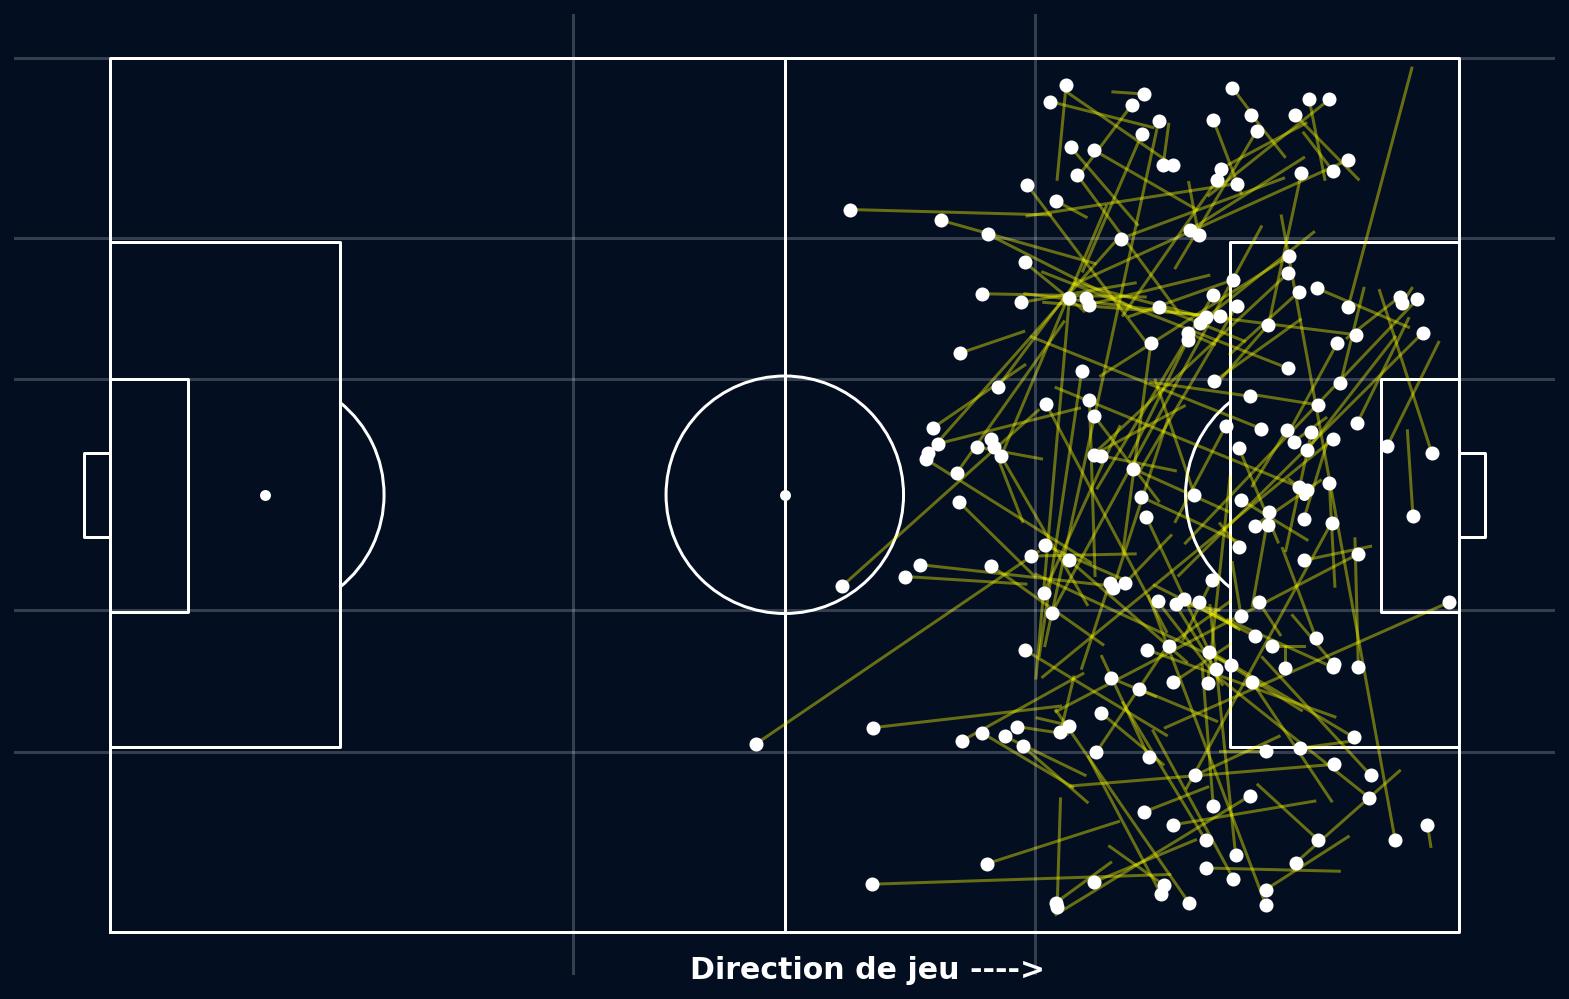

time: 1.02 s (started: 2021-09-15 17:28:46 +02:00)


In [10]:
csfont = {'fontfamily':'Montserrat'}


# Where are his passes coming from when played into the final third or the box?

Team='Rennes'
Player='Serhou Guirassy'
Technique='Through Ball'
Pattern='Regular Play'

TB=df3[(df3['type']=='Pass') &
     (df3['player']==Player) &
      (df3['x_zone']=='Tiers-offensif')].sort_values(by=['match_id','index'], ascending=True).reset_index(drop=True)


# Visualize through balls from Lovro Majer #  
background = "#030E21"

# For Horizontal View #
fig, ax = plt.subplots(figsize=(11, 7))

fig.set_facecolor(background)

draw_pitch(orientation="h",
           aspect="full",
           pitch_color=background, 
           line_color="w",
           ax=ax)

x = TB.Start_x.values
y = TB.Start_y.values
xe = TB.End_x.values
ye = TB.End_y.values

plt.scatter(xe,ye,color="w",edgecolors="w",zorder=20,alpha=1)

plt.plot([x,xe],[y,ye],alpha=0.4,color="yellow")

#plt.title("Through Passes Made in Open Play sequences",fontsize=18,color="w",**csfont,fontweight="bold")
fig.text(0.44,0.02,'Direction de jeu ---->',fontweight="bold", fontsize=15,**csfont, color="w") ###change


plt.axhline(y=14,color="w",alpha=0.2)
plt.axhline(y=25,color="w",alpha=0.2)
plt.axhline(y=43,color="w",alpha=0.2)
plt.axhline(y=54,color="w",alpha=0.2)
plt.axhline(y=68,color="w",alpha=0.2)
plt.axvline(x=36,color="w",alpha=0.2)
plt.axvline(x=72,color="w",alpha=0.2)


plt.tight_layout()
plt.show()

Text(0.5, 0.9, 'Start Locations of Passes into Box/Final Third')

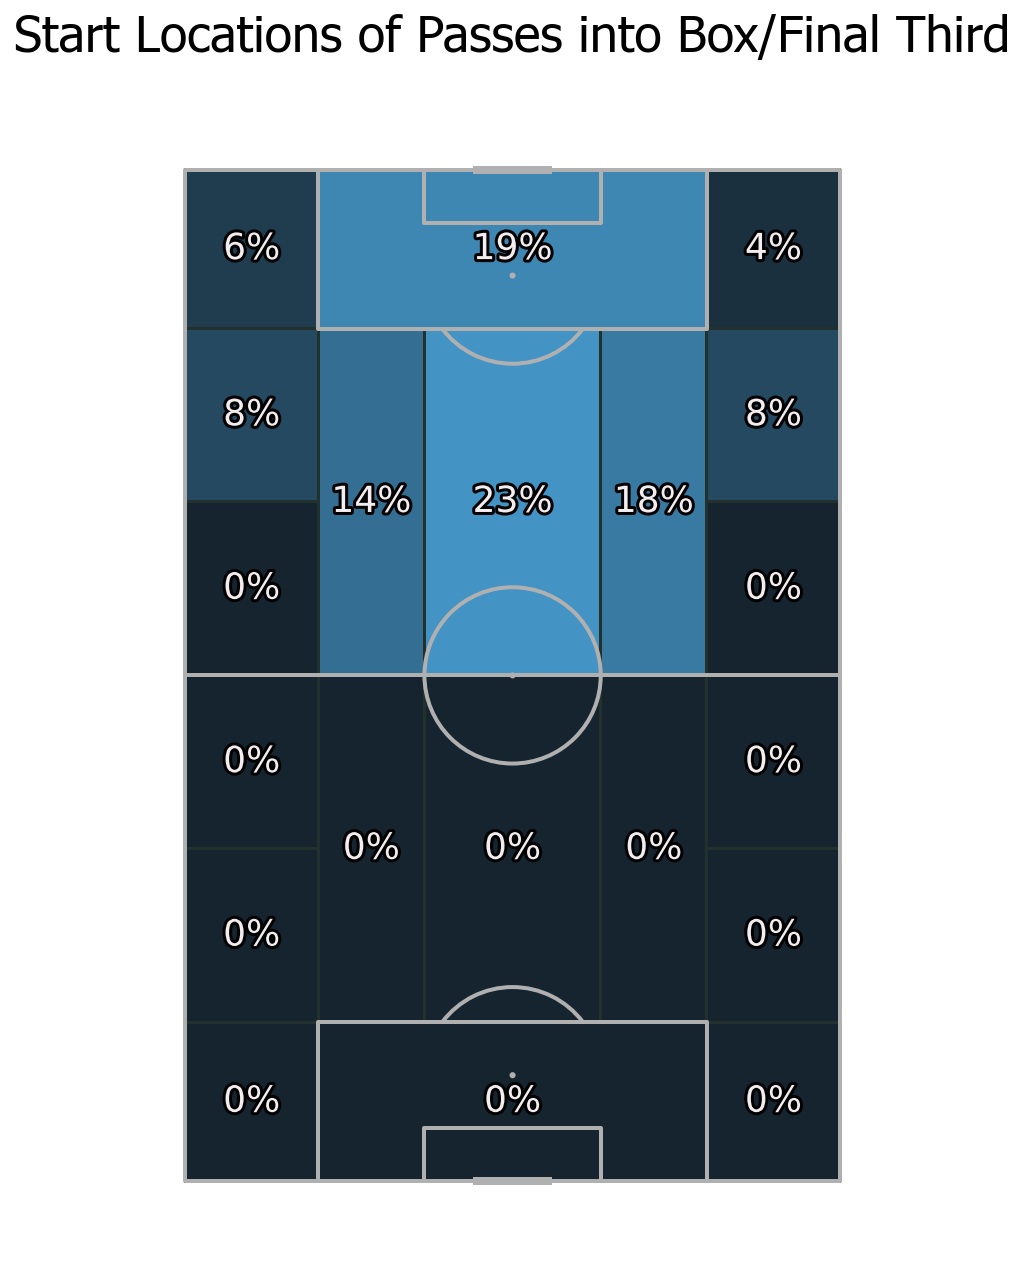

time: 1.13 s (started: 2021-09-15 17:28:56 +02:00)


In [11]:
# see the custom colormaps example for more ideas on setting colormaps
pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

# fontmanager for google font (robotto)
robotto_regular = FontManager()

path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]



pitch = VerticalPitch(pitch_type='uefa', line_zorder=2, pitch_color='w')
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      title_height=0.08, title_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.84)
fig.set_facecolor('w')

# heatmap and labels
bin_statistic = pitch.bin_statistic_positional(TB.Start_x, TB.Start_y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=axs['pitch'],
                         cmap=pearl_earring_cmap, edgecolors='#22312b')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

# endnote and title
axs['title'].text(0.5, 0.9, "Start Locations of Passes into Box/Final Third", color='black',
                  va='center', ha='center',font='tahoma', fontsize=25)
# sphinx_gallery_thumbnail_path = 'gallery/pitch_plots/images/sphx_glr_plot_heatmap_positional_002.png'


Text(0.5, 0.5, 'Dribbles/Carries made from Open Play')

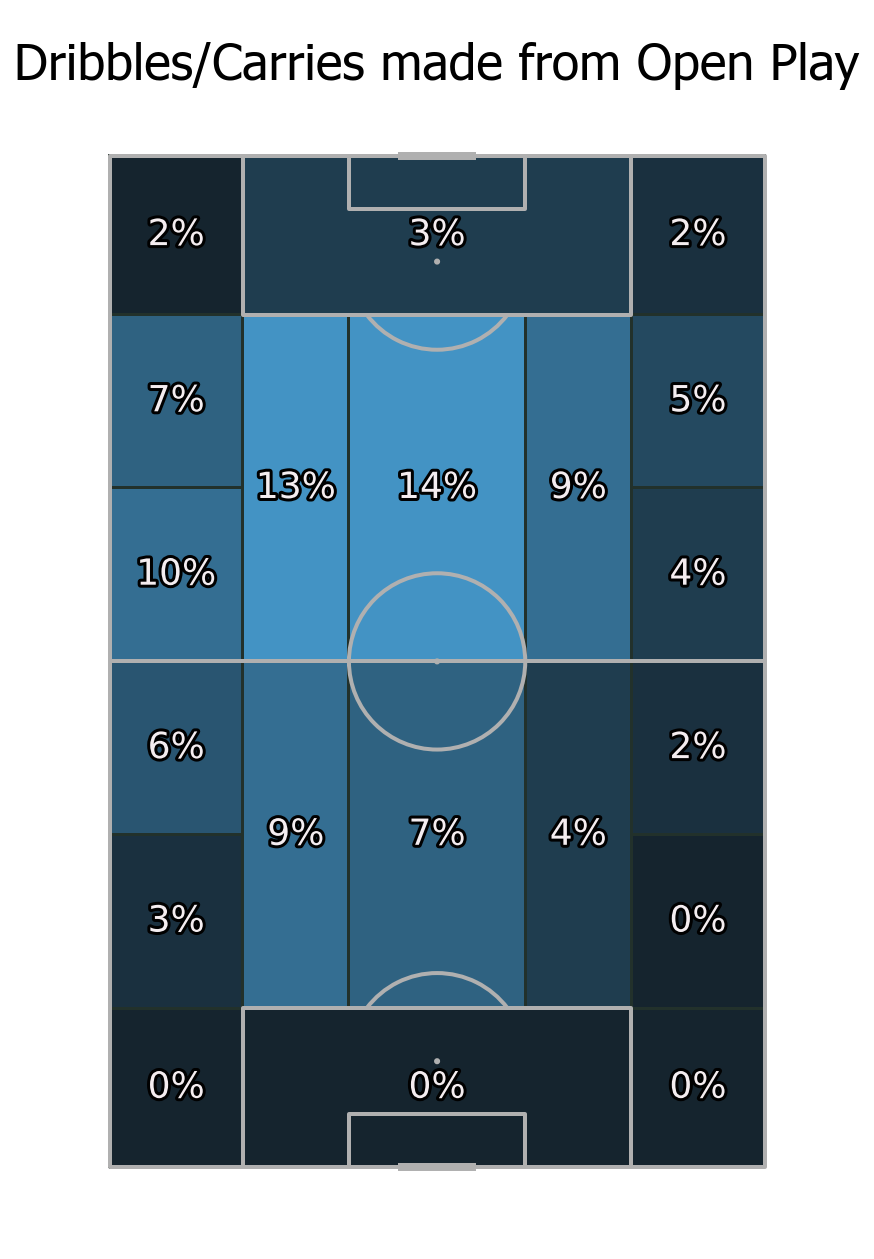

time: 3.02 s (started: 2021-09-06 09:02:24 +02:00)


In [8]:
#GoalKicks1,Corner1,FreeKicks1,Counter_Attack1,Regular_Play1

# Where are his Ball Receptions coming from Goal Kicks?

Team='Dinamo Zagreb'
Player='Lovro Majer'
Technique='Through Ball'
Pattern=['From Free Kick','From Corner']
season_name='2020/2021'

Actions=['Carry','Dribble']

# Identify starting locations of player passes in the mid and offensive tiers #

TB=df3[(df3['type'].isin(Actions)) & (df3['player']==Player)].sort_values(by=['match_id','index'], ascending=True).reset_index(drop=True)


# see the custom colormaps example for more ideas on setting colormaps
pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

# fontmanager for google font (robotto)
robotto_regular = FontManager()

path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]



pitch = VerticalPitch(pitch_type='uefa', line_zorder=2, pitch_color='w')
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      title_height=0.08, title_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.84)
fig.set_facecolor('w')

# heatmap and labels
bin_statistic = pitch.bin_statistic_positional(TB.Start_x, TB.Start_y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=axs['pitch'],
                         cmap=pearl_earring_cmap, edgecolors='#22312b')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

# endnote and title
axs['title'].text(0.5, 0.5, "Dribbles/Carries made from Open Play", color='black',
                  va='center', ha='center',font='tahoma', fontsize=25)
# sphinx_gallery_thumbnail_path = 'gallery/pitch_plots/images/sphx_glr_plot_heatmap_positional_002.png'


In [12]:
df3['season_name1']=df3['season_name'].str[2:4]
df3['season_name2']=df3['season_name'].str[::2]

df3.season_name1.unique()

array(['20'], dtype=object)

time: 477 ms (started: 2021-09-06 09:15:11 +02:00)


In [13]:
#Rightnow

array(['2020/2021', '2019/2020'], dtype=object)

time: 61.8 ms (started: 2021-09-06 09:16:01 +02:00)


In [28]:
TB_df.season_name.unique()

array(['2019/2020', '2020/2021'], dtype=object)

time: 2.3 ms (started: 2021-09-06 09:57:48 +02:00)


In [35]:
TB_df=pd.DataFrame(TB.groupby(['season_name','type','x_zone', 'y_zone']).size() / len(TB)*100)
TB_df=TB_df.set_axis(['Percentage'], axis=1, inplace=False)
TB_df.reset_index(level=['season_name','type','x_zone', 'y_zone'],inplace=True)
TB_df.to_excel('/Users/vignesh.jayanth/Documents/Lovro Majer/TB_Composition.xlsx')

time: 142 ms (started: 2021-09-06 10:24:14 +02:00)


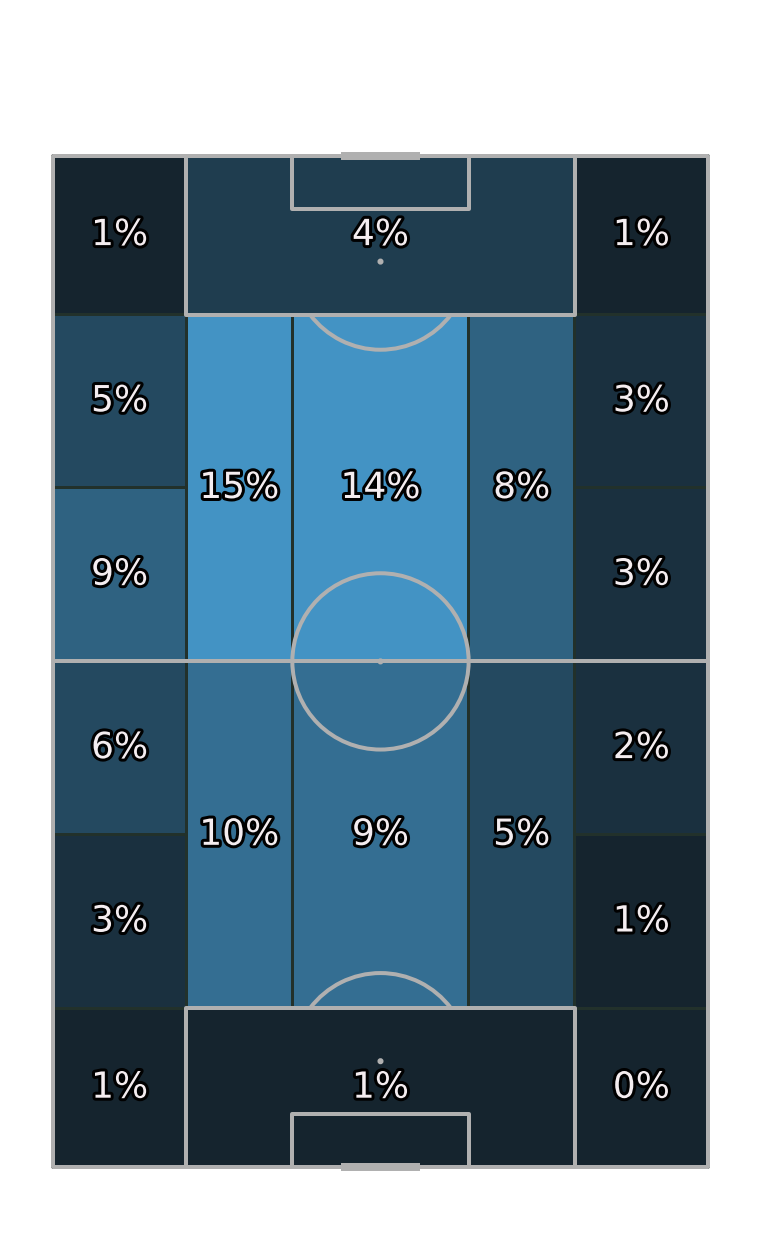

time: 850 ms (started: 2021-09-06 10:05:30 +02:00)


In [31]:
# Where are his Passes coming from Goal Kicks?

Team='Dinamo Zagreb'
Player='Lovro Majer'
Technique='Through Ball'
Pattern='Regular Play'
season_name='2020/2021'

Actions_involved=['Carry','Pass','Dribble','Ball Receipt*']

# Identify starting locations of player passes in the mid and offensive tiers #

TB=Regular_Play1[(Regular_Play1['type'].isin(Actions_involved)) & (Regular_Play1['player']==Player)].sort_values(by=['match_id','index'], ascending=True).reset_index(drop=True)

#GoalKicks1,Corner1,FreeKicks1,Counter_Attack1,Regular_Play1

# see the custom colormaps example for more ideas on setting colormaps
pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

# fontmanager for google font (robotto)
robotto_regular = FontManager()

path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]



pitch = VerticalPitch(pitch_type='uefa', line_zorder=2, pitch_color='w')
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      title_height=0.08, title_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.84)
fig.set_facecolor('w')

# heatmap and labels
bin_statistic = pitch.bin_statistic_positional(TB.Start_x, TB.Start_y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=axs['pitch'],
                         cmap=pearl_earring_cmap, edgecolors='#22312b')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

# sphinx_gallery_thumbnail_path = 'gallery/pitch_plots/images/sphx_glr_plot_heatmap_positional_002.png'


In [15]:
# Where are his Passes coming from Goal Kicks?

Team='Dinamo Zagreb'
Player='Lovro Majer'
Technique='Through Ball'
Pattern='Regular Play'
season_name='2019/2020'

# Identify starting locations of player passes in the mid and offensive tiers #

TB=df3[(df3['type']=='Pass') & (df3['player']==Player) & (df3['next_x_zone1'].isin(Tiers)) & 
       (df3['next_x_zone2'].isin(Tiers))].sort_values(by=['match_id','index'], ascending=True).reset_index(drop=True)


# see the custom colormaps example for more ideas on setting colormaps
pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

# fontmanager for google font (robotto)
robotto_regular = FontManager()

path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]



pitch = VerticalPitch(pitch_type='uefa', line_zorder=2, pitch_color='w')
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      title_height=0.08, title_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.84)
fig.set_facecolor('w')

# heatmap and labels
bin_statistic = pitch.bin_statistic_positional(TB.Start_x, TB.Start_y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=axs['pitch'],
                         cmap=pearl_earring_cmap, edgecolors='#22312b')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

# endnote and title
axs['title'].text(0.5, 0.9, "Passes into Final Third", color='black',
                  va='center', ha='center',font='tahoma', fontsize=25)
# sphinx_gallery_thumbnail_path = 'gallery/pitch_plots/images/sphx_glr_plot_heatmap_positional_002.png'


NameError: name 'Tiers' is not defined

time: 1.35 s (started: 2021-09-06 09:20:46 +02:00)


Text(0.5, 0.9, 'Passes from Goal Kicks (20/2&)')

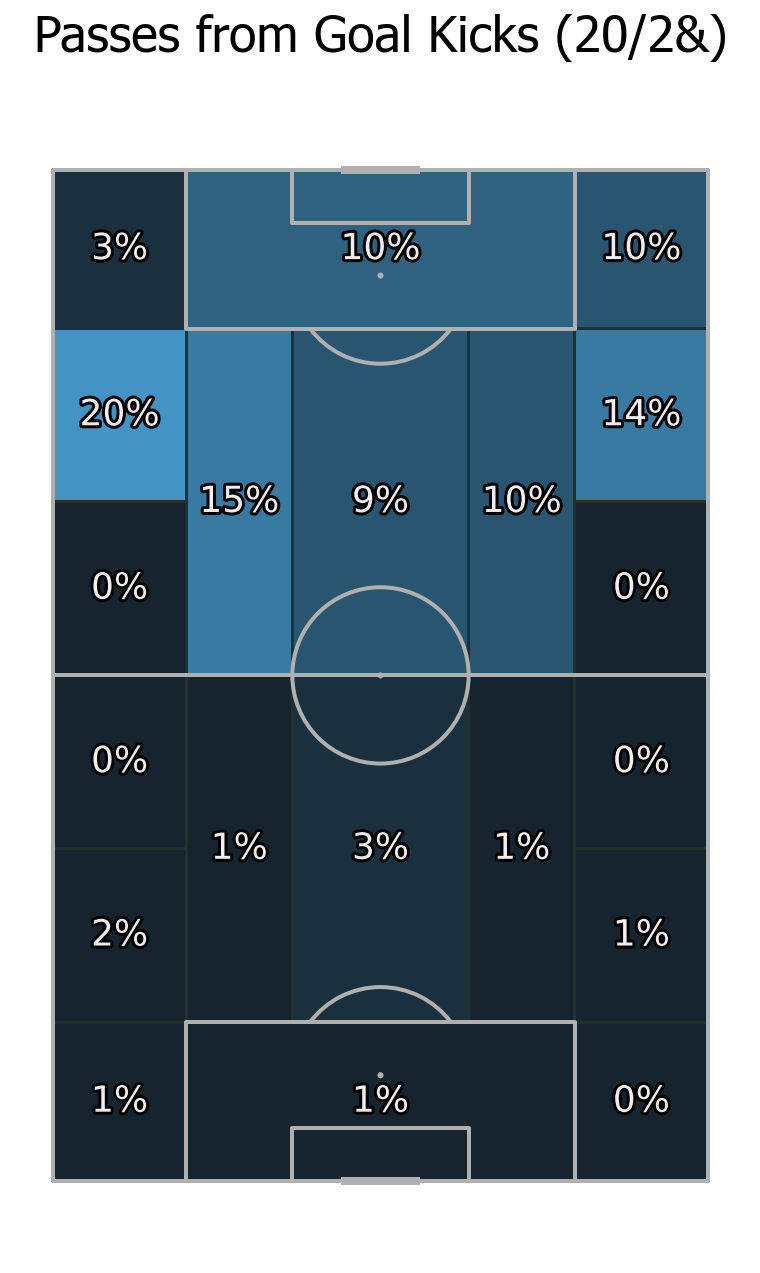

time: 1.06 s (started: 2021-09-01 17:27:24 +02:00)


In [52]:
# Where are his Passes coming from Goal Kicks?

Team='Dinamo Zagreb'
Player='Lovro Majer'
Technique='Through Ball'
Pattern='Regular Play'
season_name='2020/2021'

# Identify starting locations of player passes in the mid and offensive tiers #

TB=df3[(df3['type']=='Pass') & (df3['player']==Player) & (df3['next_x_zone1'].isin(Tiers)) &
       (df3['season_name']==season_name)].sort_values(by=['match_id','index'], ascending=True).reset_index(drop=True)


# see the custom colormaps example for more ideas on setting colormaps
pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

# fontmanager for google font (robotto)
robotto_regular = FontManager()

path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]



pitch = VerticalPitch(pitch_type='uefa', line_zorder=2, pitch_color='w')
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      title_height=0.08, title_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.84)
fig.set_facecolor('w')

# heatmap and labels
bin_statistic = pitch.bin_statistic_positional(TB.Start_x, TB.Start_y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=axs['pitch'],
                         cmap=pearl_earring_cmap, edgecolors='#22312b')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

# endnote and title
axs['title'].text(0.5, 0.9, "Passes from Goal Kicks (20/2&)", color='black',
                  va='center', ha='center',font='tahoma', fontsize=25)
# sphinx_gallery_thumbnail_path = 'gallery/pitch_plots/images/sphx_glr_plot_heatmap_positional_002.png'


In [35]:
x

array([], dtype=float64)

time: 8.18 ms (started: 2021-08-27 11:08:19 +02:00)


In [151]:
TB_df=pd.DataFrame(TB.groupby(['x_zone', 'y_zone']).size() / len(TB)*100)
TB_df=TB_df.set_axis(['Percentage'], axis=1, inplace=False)
TB_df.reset_index(level=['x_zone', 'y_zone'],inplace=True)
TB_df.to_excel('/Users/vignesh.jayanth/Documents/Lovro Majer/TB_Composition2.xlsx')

time: 24.8 ms (started: 2021-08-26 17:37:30 +02:00)


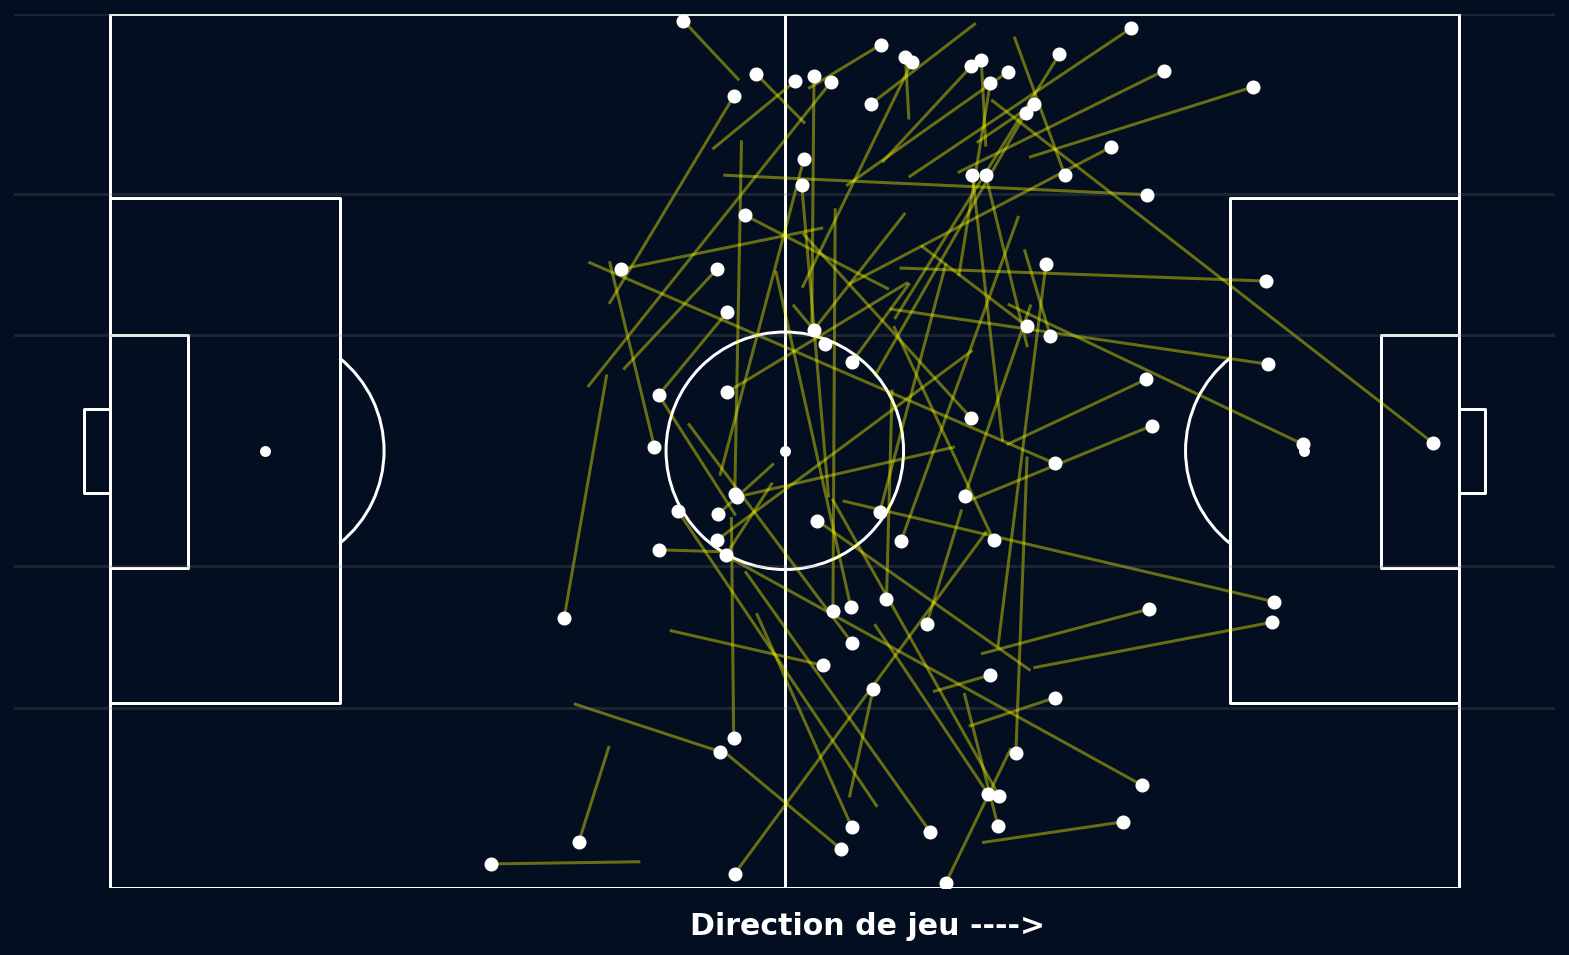

time: 895 ms (started: 2021-08-26 16:19:34 +02:00)


In [127]:
# Where are pass start locations into the final third?

Team='Dinamo Zagreb'
Player='Lovro Majer'
Type='Pass'
Technique='Through Ball'
Pattern='Regular Play'

LM=df3[(df3.x_zone=='Tiers-Médian') &
      (df3.next_x_zone=='Tiers-offensif')
      &(df3.type=='Pass')].sort_values(by=['match_id','index'], ascending=True).reset_index(drop=True)

TB=LM[(LM['player']==Player)].reset_index(drop=True)

# Visualize through balls from Lovro Majer #
  
background = "#030E21"

# For Horizontal View #
fig, ax = plt.subplots(figsize=(11, 7))

fig.set_facecolor(background)

draw_pitch(orientation="h",
           aspect="full",
           pitch_color=background, 
           line_color="w",
           ax=ax)

x = TB.Start_x.values
y = TB.Start_y.values
xe = TB.End_x.values
ye = TB.End_y.values

plt.scatter(xe,ye,color="w",edgecolors="w",zorder=20,alpha=1)
plt.plot([x,xe],[y,ye],alpha=0.4,color="yellow")



#plt.title("Lovro Majer: Through Passes Start Locations",fontsize=18,color="w",**csfont,fontweight="bold")
fig.text(0.44,0.02,'Direction de jeu ---->',fontweight="bold", fontsize=15,**csfont, color="w") ###change


plt.axhline(y=14,color="grey",alpha=0.2)
plt.axhline(y=25,color="grey",alpha=0.2)
plt.axhline(y=43,color="grey",alpha=0.2)
plt.axhline(y=54,color="grey",alpha=0.2)
plt.axhline(y=68,color="grey",alpha=0.2)

ax.set_ylim(0,68)

plt.tight_layout()
plt.show()

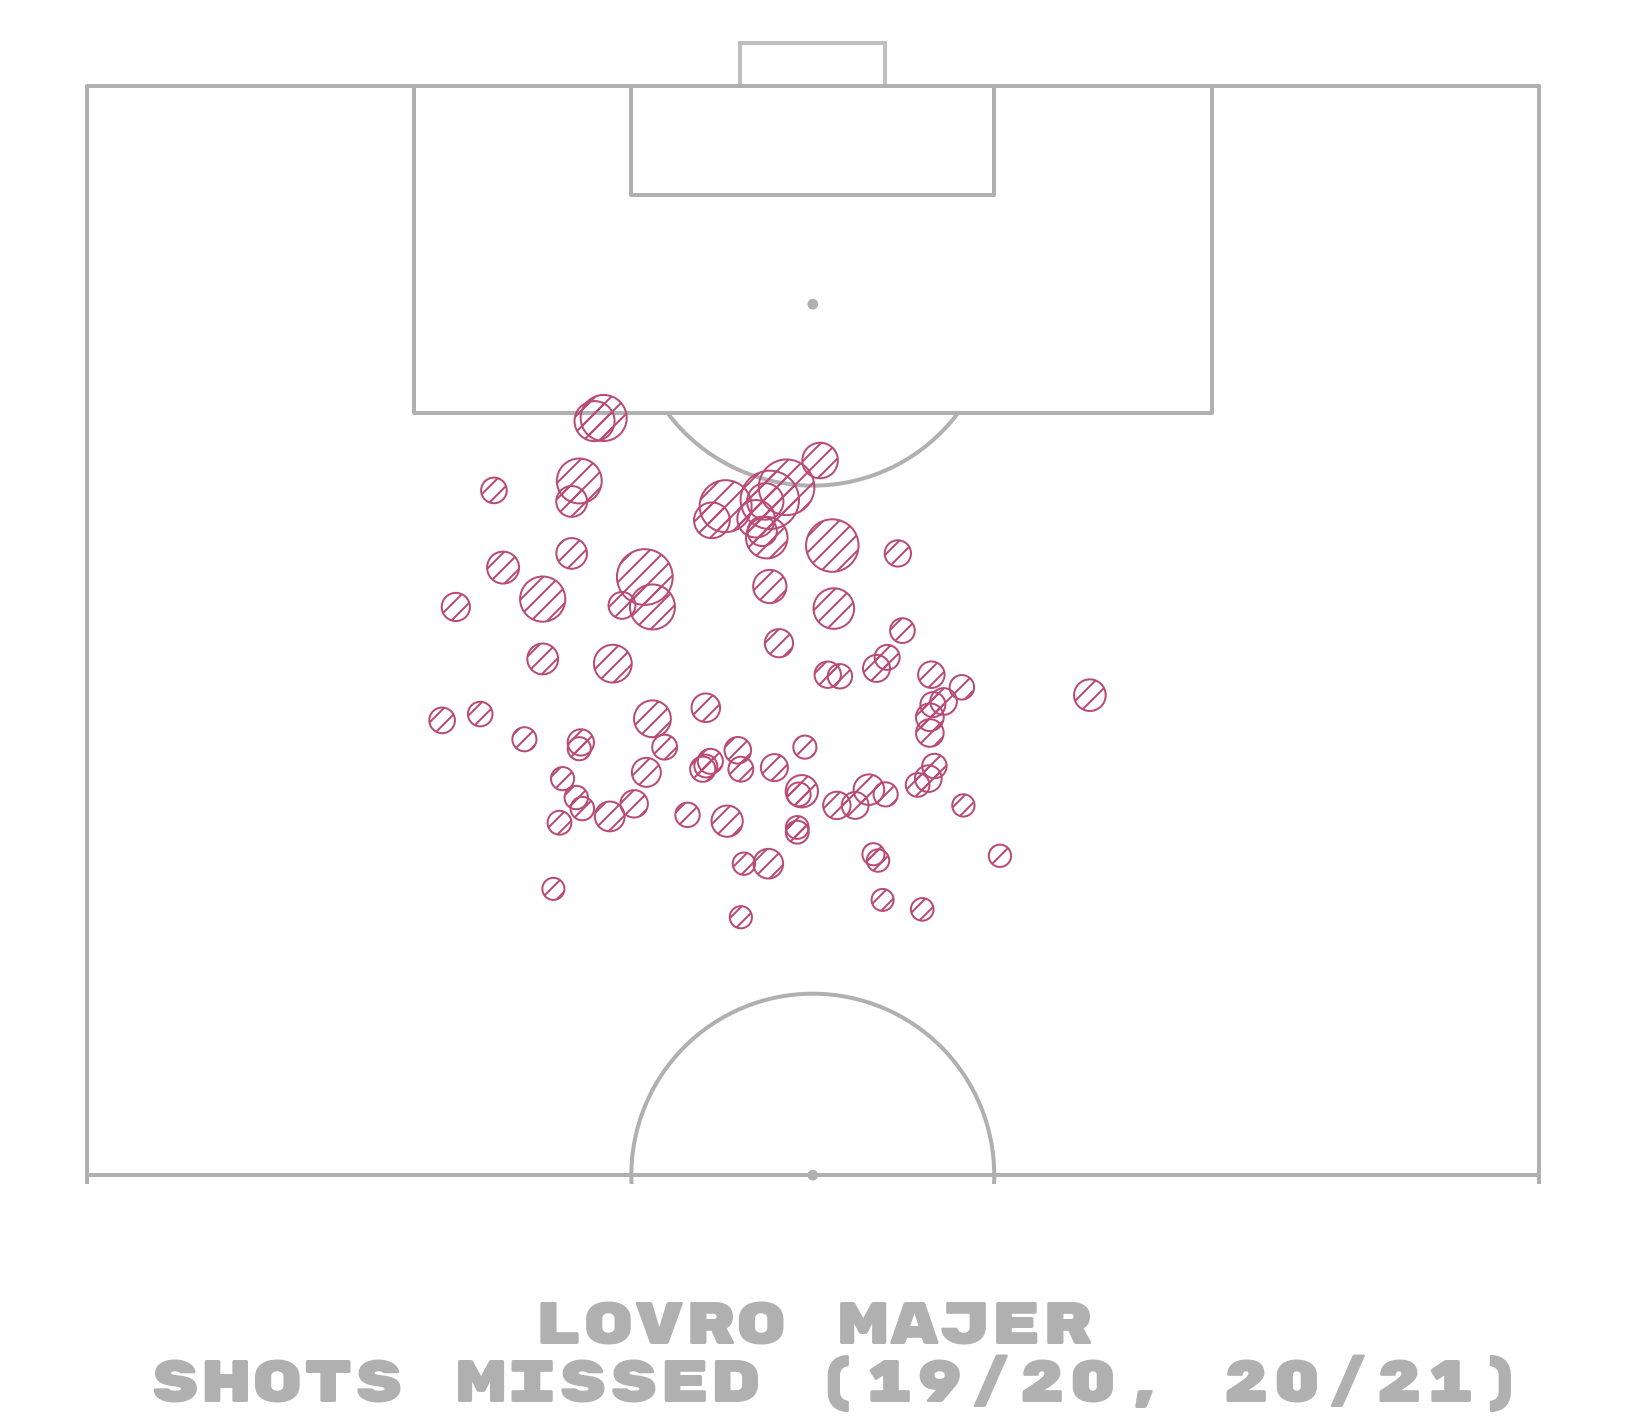

time: 6.64 s (started: 2021-09-06 15:09:42 +02:00)


In [59]:
# Where are the shots coming from?

fm_rubik = FontManager(('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
                        'RubikMonoOne-Regular.ttf?raw=true'))

Team='Dinamo Zagreb'
Player='Lovro Majer'
Type='Pass'
Technique='Through Ball'
Pattern='Regular Play'

LM=df3[(df3.type=='Shot') & (df3['player']==Player)].sort_values(by=['match_id','index'], ascending=True).reset_index(drop=True)

# filter goals / non-shot goals
df_goals = LM[LM.shot_outcome == 'Goal'].copy()
df_non_goal_shots = LM[LM.shot_outcome != 'Goal'].copy()

pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8)  # control the goal transparency

fig, ax = pitch.draw(figsize=(12, 10))

# plot non-goal shots with hatch
sc1 = pitch.scatter(df_non_goal_shots.Start_x, df_non_goal_shots.Start_y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_non_goal_shots.shot_statsbomb_xg * 1900) + 100,
                    edgecolors='#b94b75',  # give the markers a charcoal border
                    c='None',  # no facecolor for the markers
                    hatch='///',  # the all important hatch (triple diagonal lines)
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='o',
                    ax=ax)

txt = ax.text(x=40, y=50, s='Lovro Majer\n Shots Missed (19/20, 20/21)',
              size=30,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties=fm_rubik.prop, color=pitch.line_color,
              va='center', ha='center')

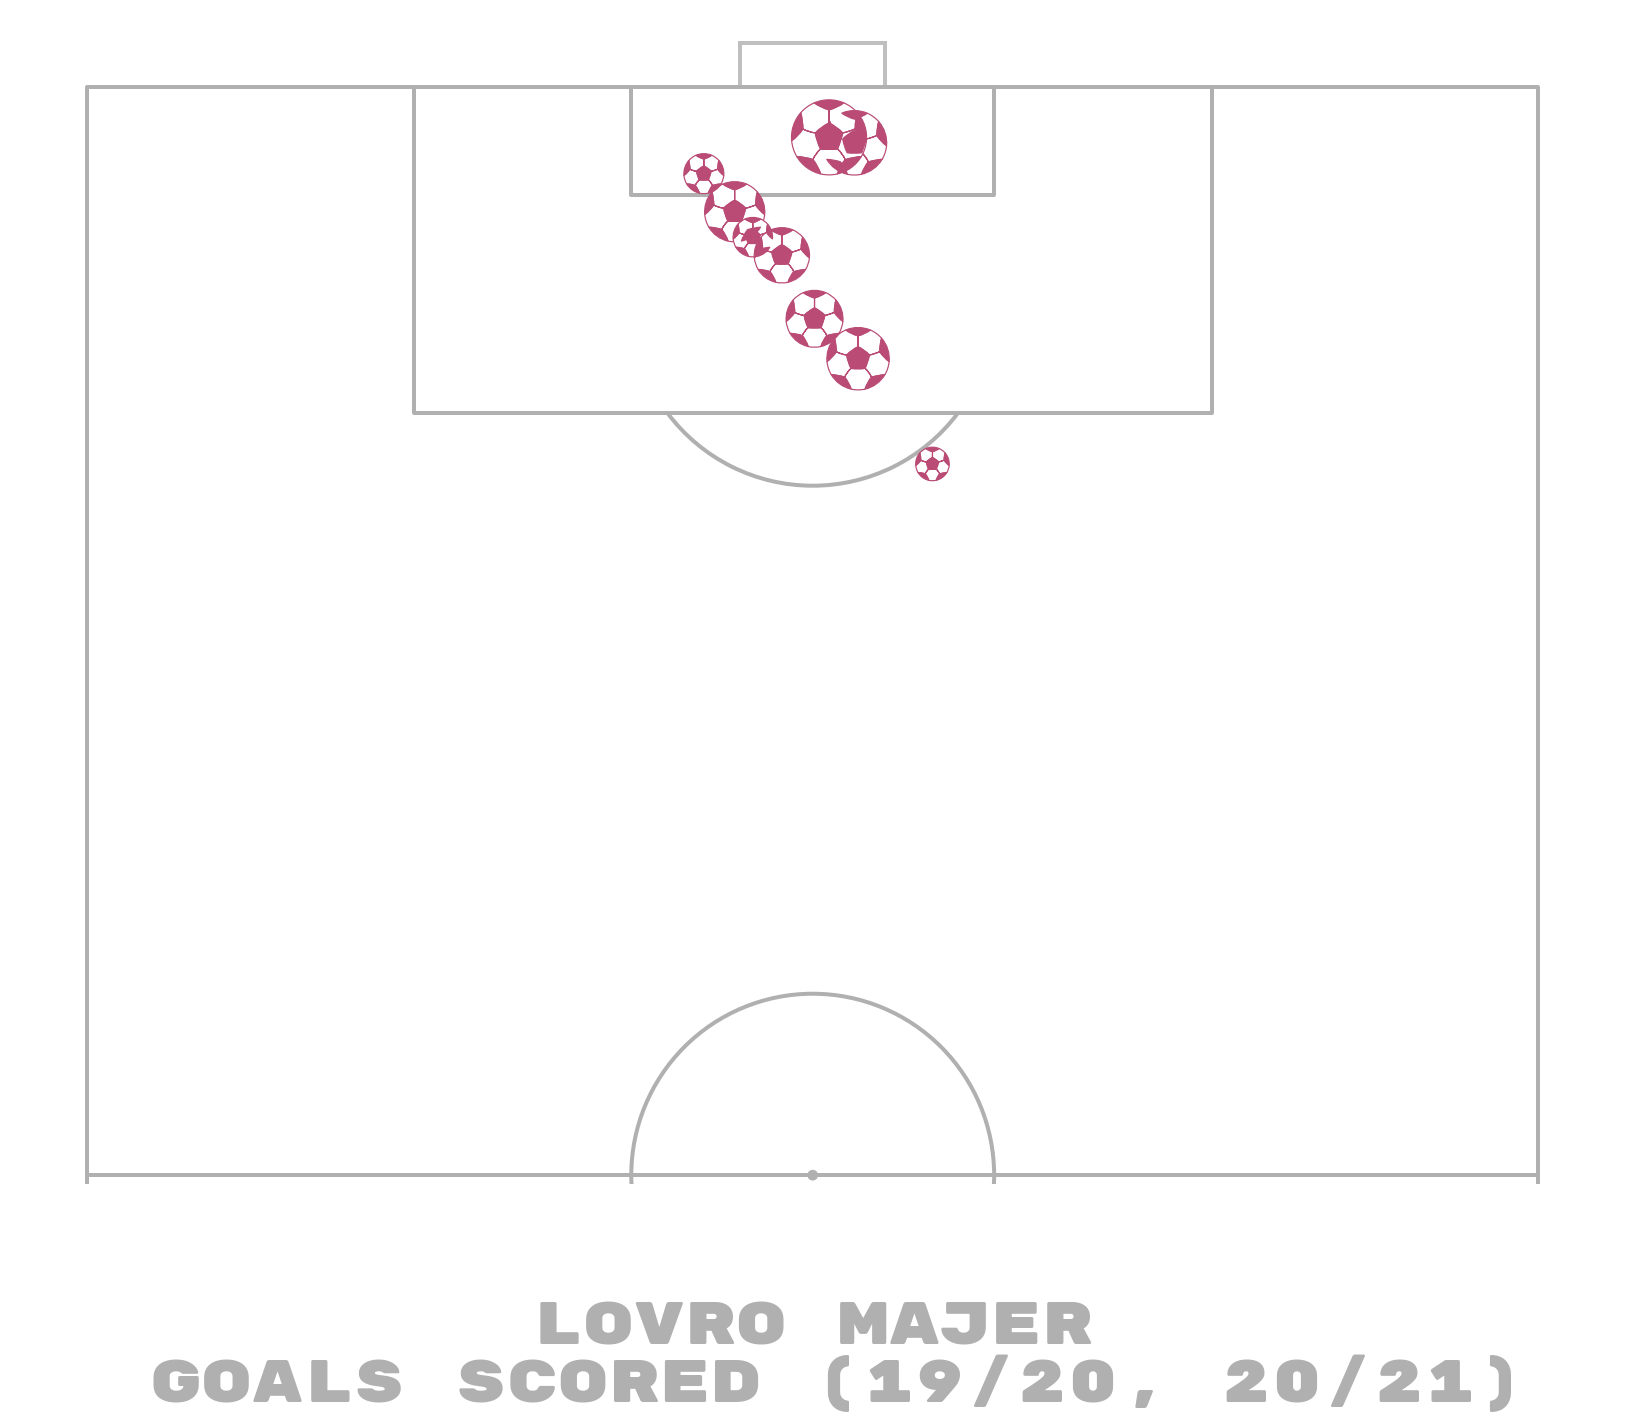

time: 1.01 s (started: 2021-08-30 17:05:26 +02:00)


In [95]:
# Where are the shots coming from?

fm_rubik = FontManager(('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
                        'RubikMonoOne-Regular.ttf?raw=true'))

Team='Dinamo Zagreb'
Player='Lovro Majer'
Type='Pass'
Technique='Through Ball'
Pattern='Regular Play'

LM=df3[(df3.type=='Shot') & (df3['player']==Player)].sort_values(by=['match_id','index'], ascending=True).reset_index(drop=True)

# filter goals / non-shot goals
df_goals = LM[LM.shot_outcome == 'Goal'].copy()

pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8)  # control the goal transparency

fig, ax = pitch.draw(figsize=(12, 10))

# plot non-goal shots with hatch
sc1 = pitch.scatter(df_goals.Start_x, df_goals.Start_y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals.shot_statsbomb_xg * 1900) + 100,
                    edgecolors='#b94b75',
                    linewidth=0.6,
                    c='white',
                    marker='football',
                    ax=ax)

txt = ax.text(x=40, y=50, s='Lovro Majer\n Goals Scored (19/20, 20/21)',
              size=30,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties=fm_rubik.prop, color=pitch.line_color,
              va='center', ha='center')

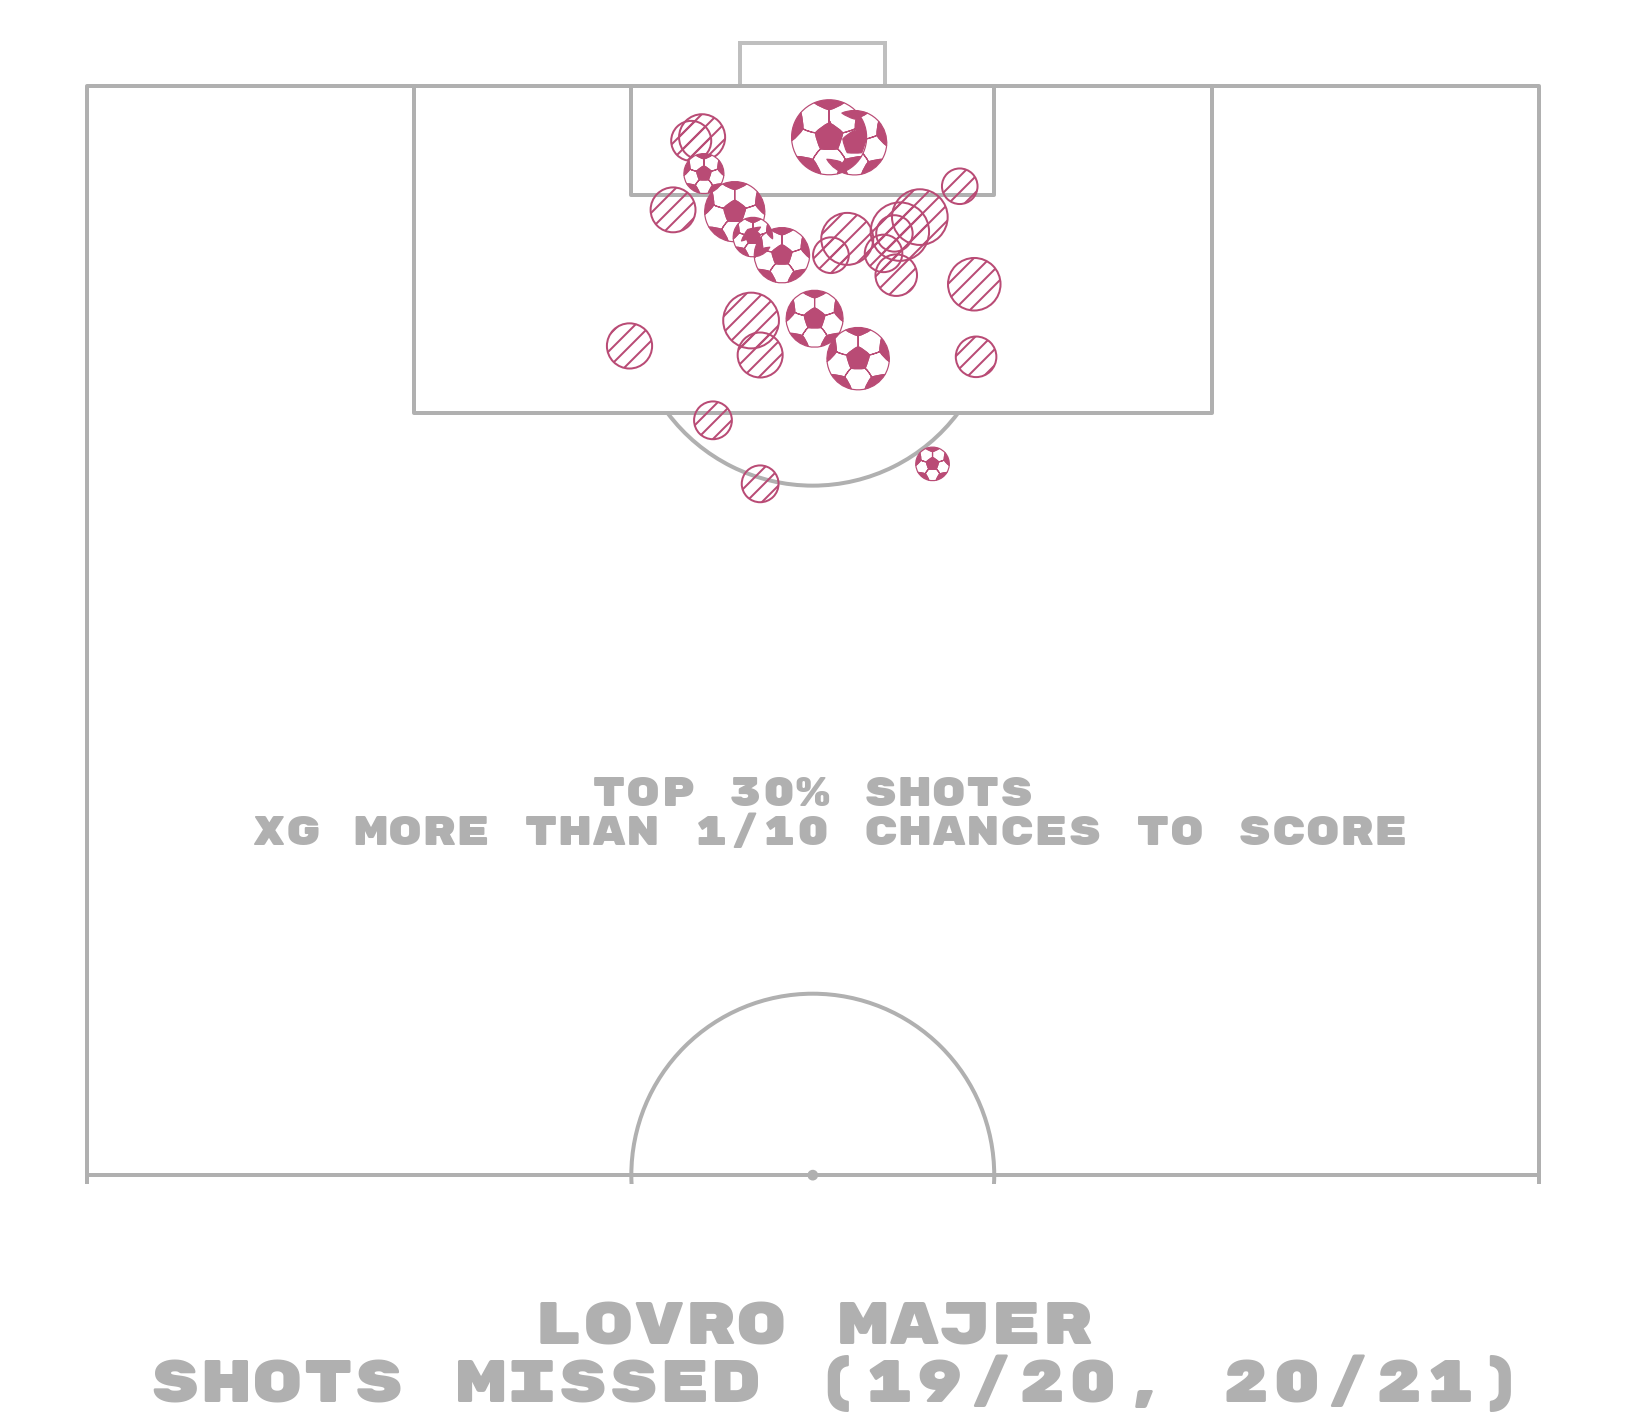

time: 1.44 s (started: 2021-08-30 17:11:40 +02:00)


In [98]:
# Where are the shots coming from?

fm_rubik = FontManager(('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
                        'RubikMonoOne-Regular.ttf?raw=true'))

Team='Dinamo Zagreb'
Player='Lovro Majer'
Type='Pass'
Technique='Through Ball'
Pattern='Regular Play'

LM=df2[(df2.type=='Shot') 
       & (df2['player']==Player)].sort_values(by=['match_id','index'], ascending=True).reset_index(drop=True)

#I want the Goals and the High xG shots
xg_shots=sorted(list(LM.shot_statsbomb_xg.unique()), reverse=True)
xg_shots1= [i for i in xg_shots if i >= 0.1]

LM1=LM[LM['shot_statsbomb_xg'].isin(xg_shots1)].reset_index(drop=True)

# filter goals / non-shot goals
df_goals = LM1[LM1.shot_outcome == 'Goal'].copy()
df_non_goal_shots = LM1[LM1.shot_outcome != 'Goal'].copy()

pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8)  # control the goal transparency

fig, ax = pitch.draw(figsize=(12, 10))

# plot non-goal shots with hatch
sc1 = pitch.scatter(df_non_goal_shots.Start_x, df_non_goal_shots.Start_y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_non_goal_shots.shot_statsbomb_xg * 1900) + 100,
                    edgecolors='#b94b75',  # give the markers a charcoal border
                    c='None',  # no facecolor for the markers
                    hatch='///',  # the all important hatch (triple diagonal lines)
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='o',
                    ax=ax)

txt = ax.text(x=40, y=50, s='Lovro Majer\n Shots Missed (19/20, 20/21)',
              size=30,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties=fm_rubik.prop, color=pitch.line_color,
              va='center', ha='center')

# plot non-goal shots with hatch
sc1 = pitch.scatter(df_goals.Start_x, df_goals.Start_y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals.shot_statsbomb_xg * 1900) + 100,
                    edgecolors='#b94b75',
                    linewidth=0.6,
                    c='white',
                    marker='football',
                    ax=ax)

txt = ax.text(x=40, y=80, s='Top 30% shots\n xG more than 1/10 Chances to score',
              size=20,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties=fm_rubik.prop, color=pitch.line_color,
              va='center', ha='center')

In [99]:
LM1.to_csv('/Users/vignesh.jayanth/Documents/LM1.csv')

time: 6.24 ms (started: 2021-08-30 17:12:12 +02:00)


In [89]:
df.position.unique()

array([nan, 'Left Center Forward', 'Right Center Back', 'Goalkeeper', 'Right Back', 'Left Center Back', 'Left Back',
       'Right Wing Back', 'Left Wing Back', 'Right Defensive Midfield', 'Right Wing', 'Right Center Midfield',
       'Center Defensive Midfield', 'Left Center Midfield', 'Center Back', 'Center Forward', 'Left Wing',
       'Right Center Forward', 'Center Attacking Midfield', 'Left Defensive Midfield', 'Left Attacking Midfield',
       'Right Attacking Midfield', 'Left Midfield', 'Right Midfield', 'Substitute'], dtype=object)

time: 314 ms (started: 2021-08-30 14:57:22 +02:00)


In [70]:
print(len(xg_shots1))
print(len(xg_shots))

27
94
time: 324 µs (started: 2021-08-30 12:29:59 +02:00)


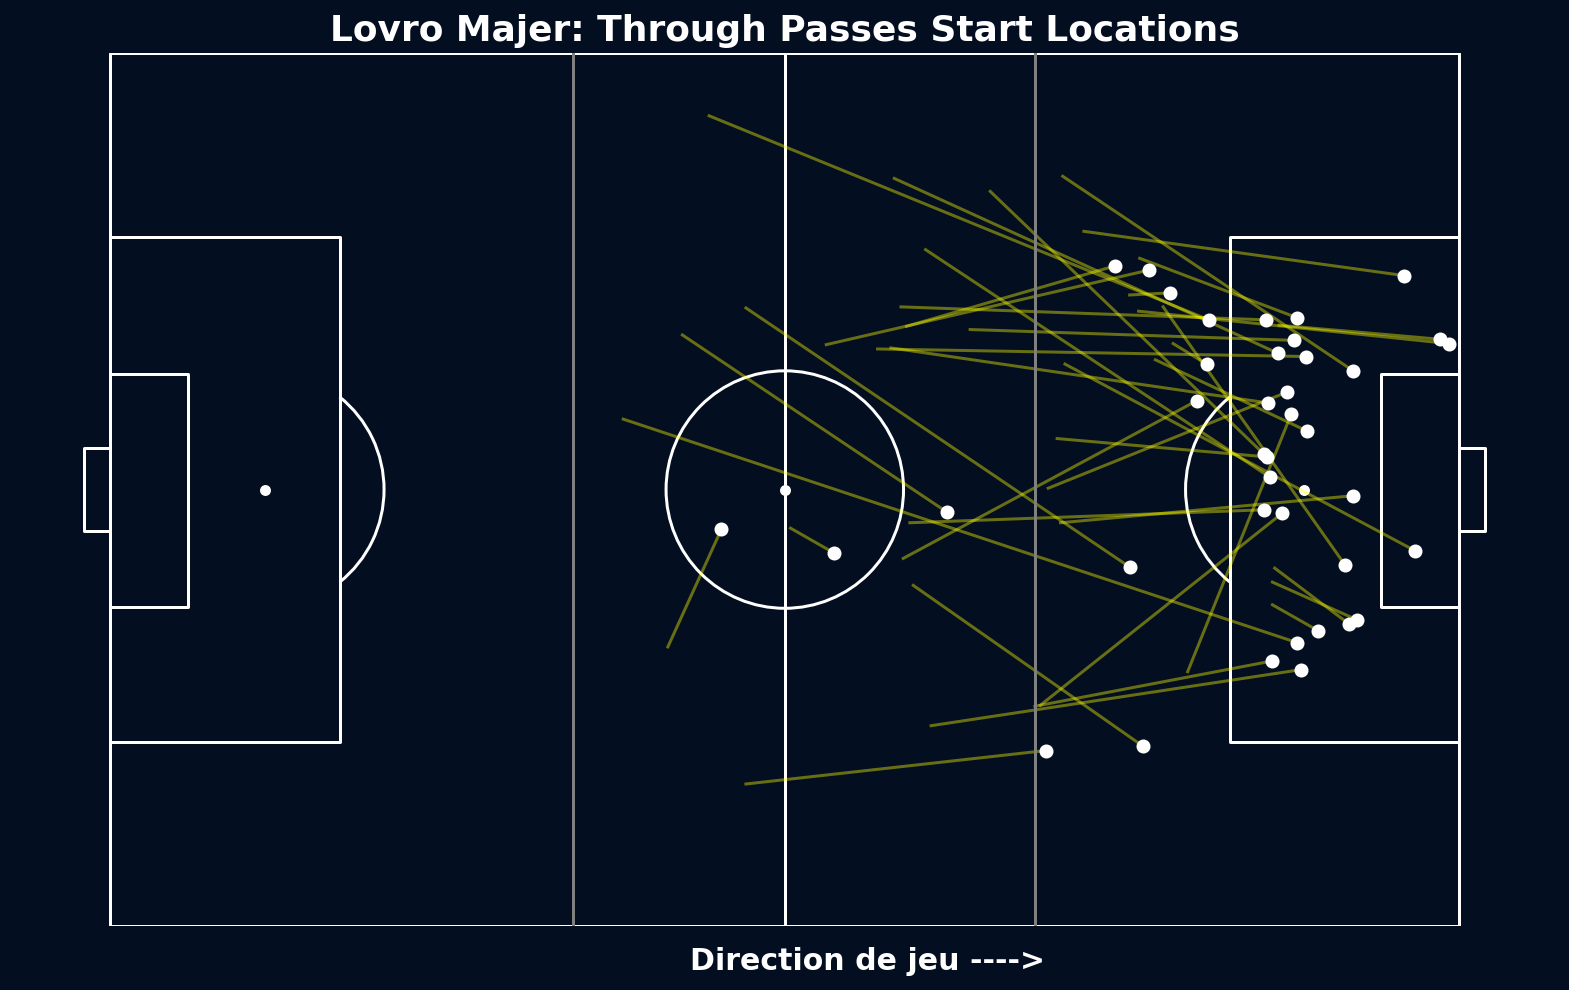

time: 501 ms (started: 2021-09-07 13:54:26 +02:00)


In [30]:
csfont = {'fontfamily':'Montserrat'}

# Where are the through passes coming from Regular Play?

Team='Dinamo Zagreb'
Player='Lovro Majer'
Type='Pass'
Technique='Through Ball'
Pattern='Regular Play'

LM=df3[(df3.player==Player)].sort_values(by=['match_id','index'], ascending=True).reset_index(drop=True)

TB=LM[(LM['pass_technique']==Technique)].reset_index(drop=True)

# Visualize through balls from Lovro Majer #
Patterns=TB.play_pattern.values
  
background = "#030E21"

# For Horizontal View #
fig, ax = plt.subplots(figsize=(11, 7))

fig.set_facecolor(background)

draw_pitch(orientation="h",
           aspect="full",
           pitch_color=background, 
           line_color="w",
           ax=ax)

x = TB.Start_x.values
y = TB.Start_y.values
xe = TB.End_x.values
ye = TB.End_y.values

plt.scatter(xe,ye,color="w",edgecolors="w",zorder=20,alpha=1)

plt.plot([x,xe],[y,ye],alpha=0.4,color="yellow")

plt.title("Lovro Majer: Through Passes Start Locations",fontsize=18,color="w",**csfont,fontweight="bold")
fig.text(0.44,0.02,'Direction de jeu ---->',fontweight="bold", fontsize=15,**csfont, color="w") ###change

plt.axvline(x=36,color="grey")
plt.axvline(x=72,color="grey")
ax.set_ylim(0,68)

plt.tight_layout()
plt.show()

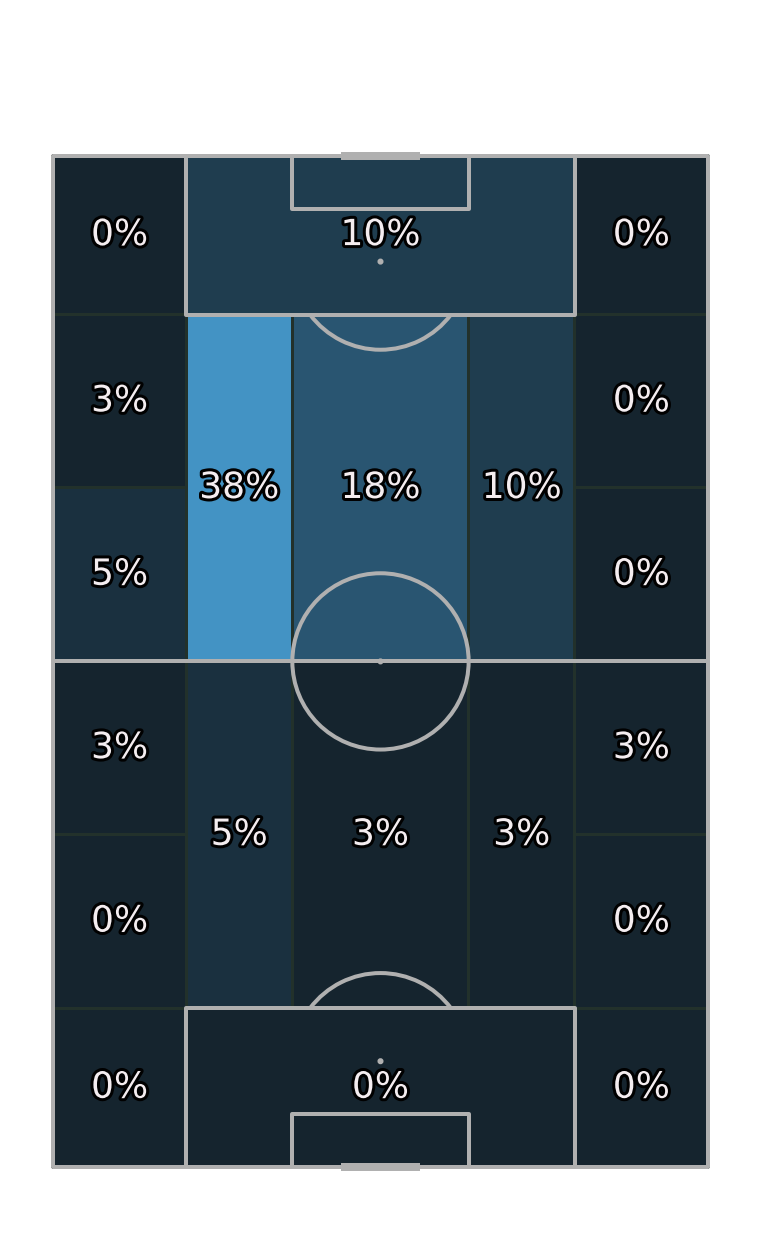

time: 1.17 s (started: 2021-09-07 13:56:59 +02:00)


In [32]:

pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

# fontmanager for google font (robotto)
robotto_regular = FontManager()

path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

pitch = VerticalPitch(pitch_type='uefa', line_zorder=2, pitch_color='w')
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      title_height=0.08, title_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.84)
fig.set_facecolor('w')

# heatmap and labels
bin_statistic = pitch.bin_statistic_positional(TB.Start_x, TB.Start_y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=axs['pitch'],
                         cmap=pearl_earring_cmap, edgecolors='#22312b')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)


plt.show()  # If you are using a Jupyter notebook you do not need this line

In [44]:
df3.shot_type.unique()

array([nan, 'Open Play', 'Corner', 'Penalty', 'Free Kick', 'Kick Off'], dtype=object)

time: 3.24 s (started: 2021-09-06 11:02:17 +02:00)


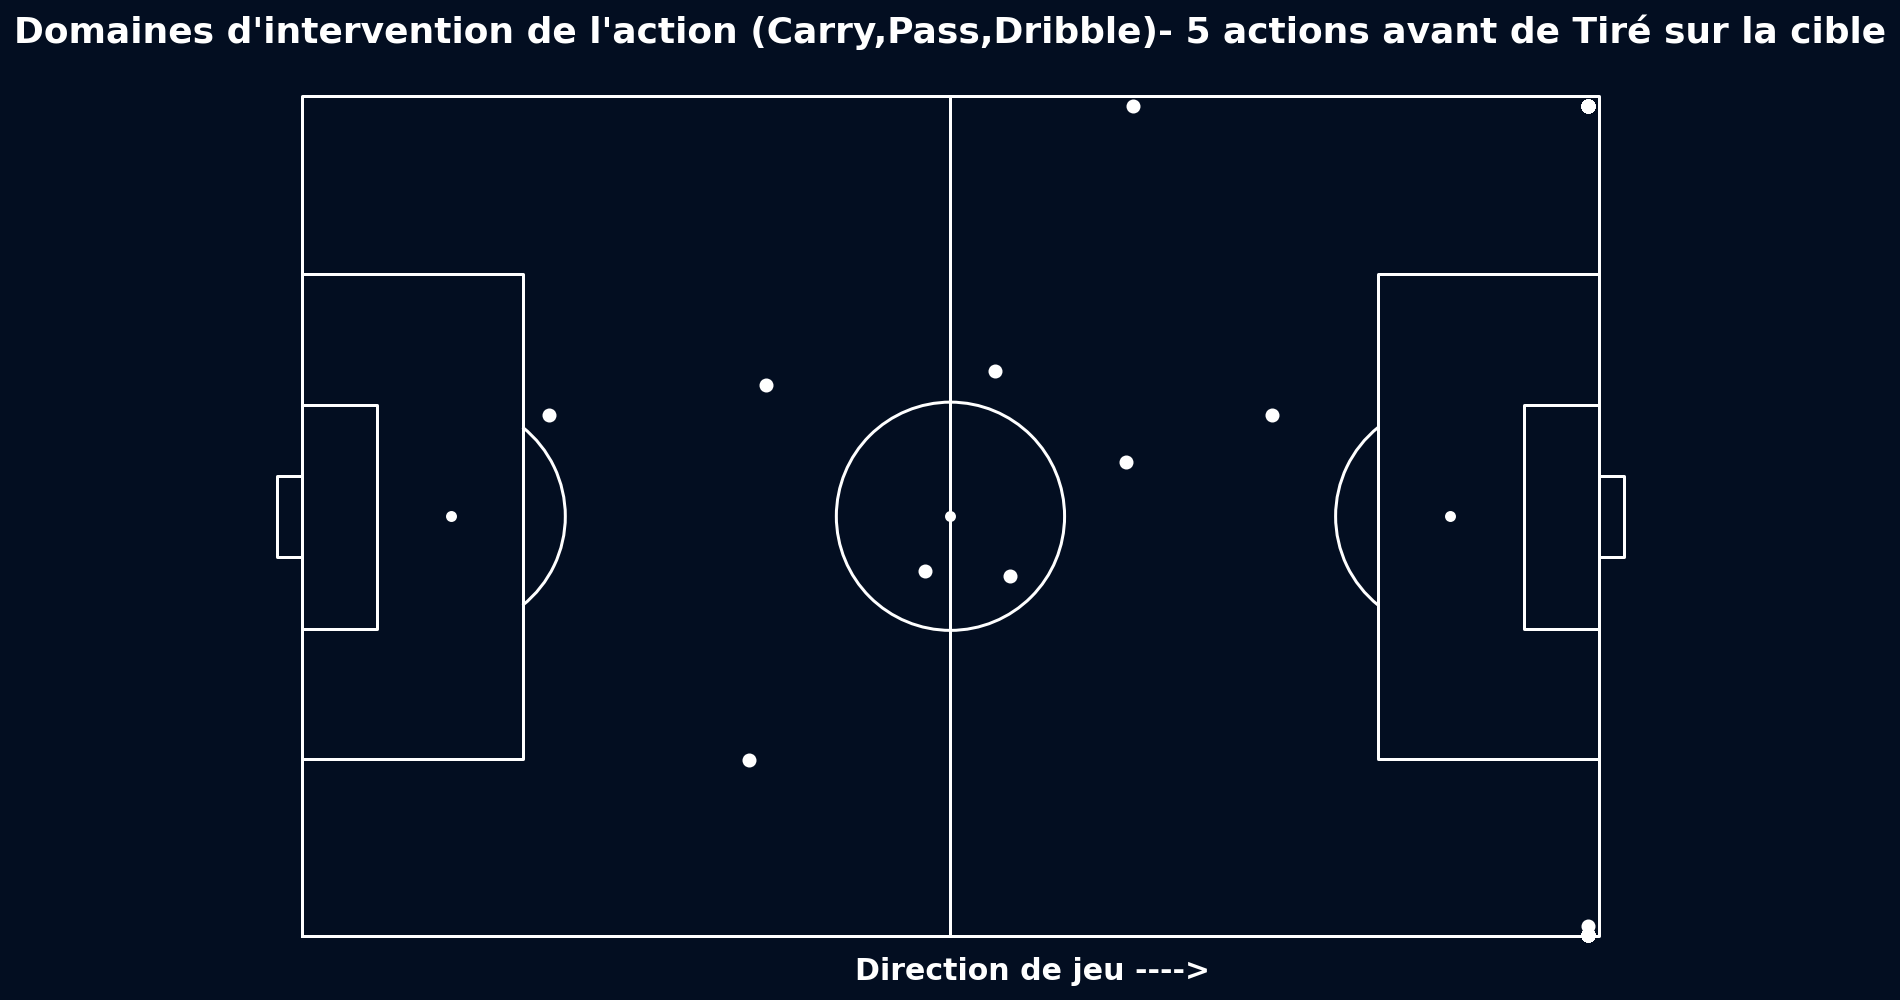

time: 4.39 s (started: 2021-09-07 13:52:54 +02:00)


In [27]:
# Player Involvement areas before a shot on target?

Team='Dinamo Zagreb'
Player='Lovro Majer'
Type='Shot'
Pattern='Regular Play'
Shot_type='Open Play'

ST=df3[(df3.type==Type) & (df3.shot_type==Shot_type)].sort_values(by=['match_id','index'], ascending=True).reset_index(drop=True)

Actions_involved=['Carry','Pass','Dribble']

ST1=ST[(ST['player-1']==Player) & (ST['prev_event1'].isin(Actions_involved)) & 
      (ST['player-2']!=Player) & (ST['player-3']!=Player) & (ST['player-4']!=Player) & 
      (ST['player-5']!=Player)].reset_index(drop=True)
ST1['Final_x']=ST1['prev_x1']
ST1['Final_y']=ST1['prev_y1']
ST1['Player°']=ST1['player-1']
ST1['prev_event°']=ST1['prev_event1']


ST2=ST[(ST['player-2']==Player) & (ST['prev_event2'].isin(Actions_involved)) & 
      (ST['player-1']!=Player) & (ST['player-3']!=Player) & (ST['player-4']!=Player) & 
      (ST['player-5']!=Player)].reset_index(drop=True)
ST2['Final_x']=ST2['prev_x2']
ST2['Final_y']=ST2['prev_y2']
ST2['Player°']=ST2['player-2']
ST2['prev_event°']=ST2['prev_event2']


ST3=ST[(ST['player-3']==Player) & (ST['prev_event3'].isin(Actions_involved)) & 
      (ST['player-2']!=Player) & (ST['player-1']!=Player) & (ST['player-4']!=Player) & 
      (ST['player-5']!=Player)].reset_index(drop=True)
ST3['Final_x']=ST3['prev_x3']
ST3['Final_y']=ST3['prev_y3']
ST3['Player°']=ST3['player-3']
ST3['prev_event°']=ST3['prev_event3']


ST4=ST[(ST['player-4']==Player) & (ST['prev_event4'].isin(Actions_involved)) & 
      (ST['player-2']!=Player) & (ST['player-3']!=Player) & (ST['player-1']!=Player) & 
      (ST['player-5']!=Player)].reset_index(drop=True)
ST4['Final_x']=ST4['prev_x4']
ST4['Final_y']=ST4['prev_y4']
ST4['Player°']=ST4['player-4']
ST4['prev_event°']=ST4['prev_event4']


ST5=ST[(ST['player-5']==Player) & (ST['prev_event5'].isin(Actions_involved)) & 
      (ST['player-2']!=Player) & (ST['player-3']!=Player) & (ST['player-4']!=Player) & 
      (ST['player-1']!=Player)].reset_index(drop=True)
ST5['Final_x']=ST5['prev_x5']
ST5['Final_y']=ST5['prev_y5']
ST5['Player°']=ST5['player-5']
ST5['prev_event°']=ST5['prev_event5']

ST_final=pd.concat([ST1,ST2,ST3,ST4,ST5])


# Identifying the Previous "5 players involved in actions"

background = "#030E21"

# For Horizontal View #
fig, ax = plt.subplots(figsize=(11, 7))

fig.set_facecolor(background)

draw_pitch(orientation="h",
           aspect="full",
           pitch_color=background, 
           line_color="w",
           ax=ax)

x = ST_final.Final_x.values
y = ST_final.Final_y.values
Player = ST_final['Player°'].values


plt.scatter(x,y,color="w",edgecolors="w",zorder=12,alpha=1)

plt.title("Domaines d'intervention de l'action (Carry,Pass,Dribble)- 5 actions avant de Tiré sur la cible",fontsize=18,color="w",fontweight="bold")
fig.text(0.44,0.02,'Direction de jeu ---->',fontweight="bold", fontsize=15, color="w") ###change


plt.tight_layout()
plt.show()

In [25]:
ST_final1=ST_final[['minute','second','shot_body_part','timestamp','player',
                    'match_date','home_team_name','away_team_name']]
ST_final1.to_excel('/Users/vignesh.jayanth/Documents/ST_final.xlsx')

time: 26.5 ms (started: 2021-09-07 12:19:34 +02:00)


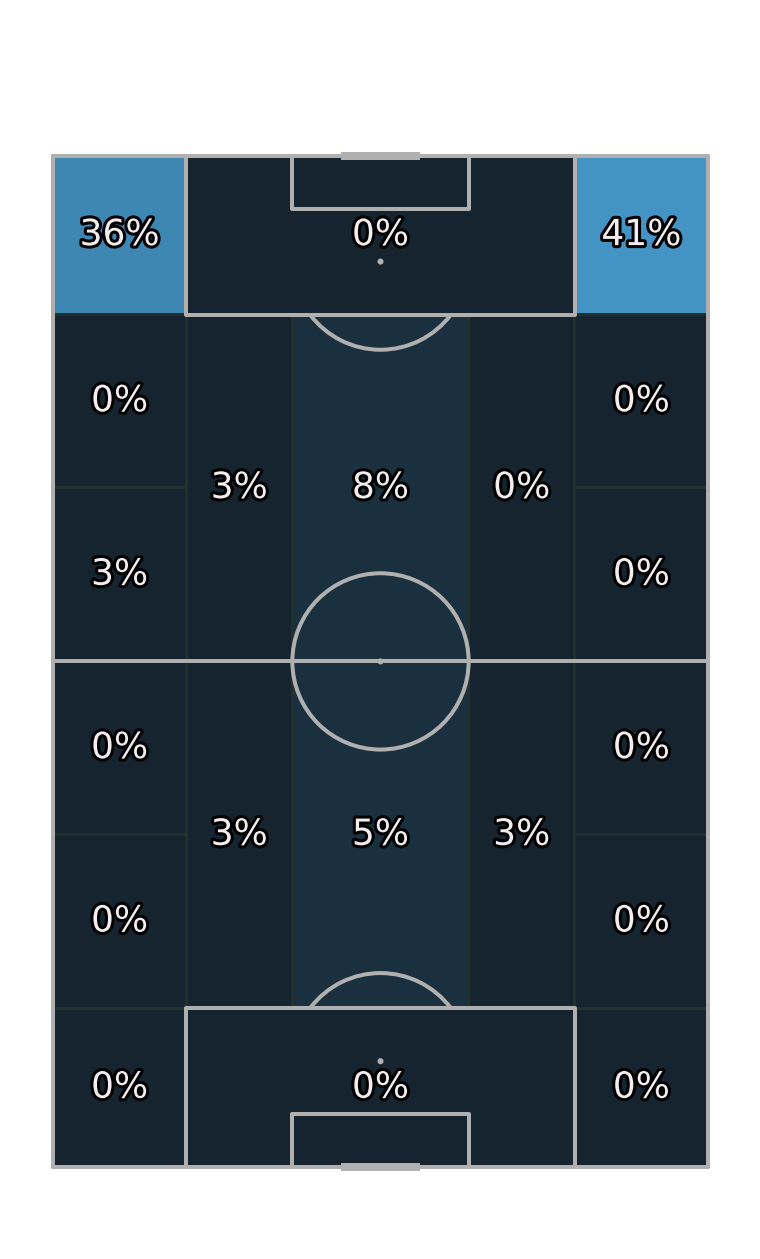

time: 558 ms (started: 2021-09-07 12:12:22 +02:00)


In [24]:

pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

# fontmanager for google font (robotto)
robotto_regular = FontManager()

path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

pitch = VerticalPitch(pitch_type='uefa', line_zorder=2, pitch_color='w')
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      title_height=0.08, title_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.84)
fig.set_facecolor('w')

# heatmap and labels
bin_statistic = pitch.bin_statistic_positional(ST_final.Final_x, ST_final.Final_y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=axs['pitch'],
                         cmap=pearl_earring_cmap, edgecolors='#22312b')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)


plt.show()  # If you are using a Jupyter notebook you do not need this line

In [58]:
TB_df=pd.DataFrame(ST_final.groupby(['season_name','prev_event°']).size() / len(TB)*100)
TB_df=TB_df.set_axis(['Percentage'], axis=1, inplace=False)
TB_df.reset_index(level=['season_name','prev_event°'],inplace=True)
TB_df.to_excel('/Users/vignesh.jayanth/Documents/Lovro Majer/F_cmp.xlsx')

time: 15.4 ms (started: 2021-09-06 11:12:35 +02:00)


In [ ]:



pitch = VerticalPitch(line_color='#000009', line_zorder=2)
fig, ax = pitch.draw(figsize=(4.4, 6.4))
kde = pitch.kdeplot(df.Start_x, df.Start_y, ax=ax,
                    # shade using 100 levels so it looks smooth
                    shade=True, levels=100,
                    # shade the lowest area so it looks smooth
                    # so even if there are no events it gets some color
                    shade_lowest=True,
                    cut=4,  # extended the cut so it reaches the bottom edge
                    cmap='Blues')

In [159]:
print(len(ST))

2956
time: 369 µs (started: 2021-08-26 17:55:38 +02:00)


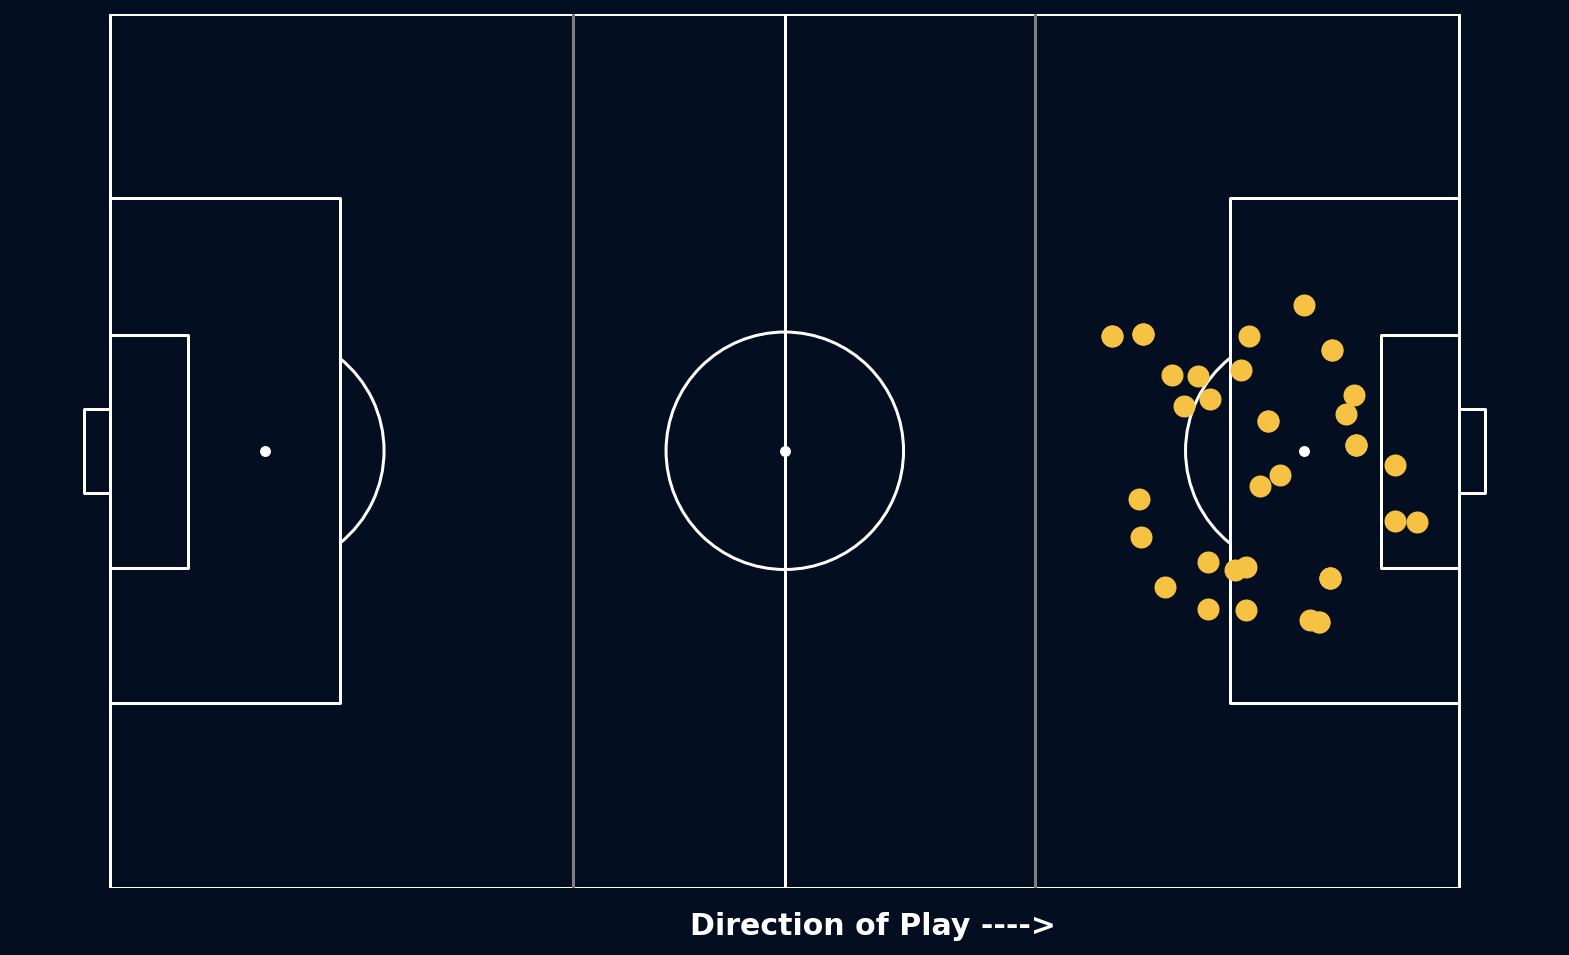

time: 604 ms (started: 2021-08-25 10:22:20 +02:00)


In [66]:
# Player Involvement areas before a shot on target?

Team='Dinamo Zagreb'
Player='Lovro Majer'
Type='Shot'
Pattern='Regular Play'

ST=df3[(df3.play_pattern==Pattern) &
      (df3.type==Type)].sort_values(by=['match_id','index'], ascending=True).reset_index(drop=True)

Actions_involved=['Ball Receipt*', 'Carry', 'Duel','Pass']

ST1=ST[(ST['player_1']==Player) & (ST['prev_1'].isin(Actions_involved))].reset_index(drop=True)
ST2=ST[(ST['player_2']==Player) & (ST['prev_2'].isin(Actions_involved))].reset_index(drop=True)
ST3=ST[(ST['player_3']==Player) & (ST['prev_3'].isin(Actions_involved))].reset_index(drop=True)
ST4=ST[(ST['player_4']==Player) & (ST['prev_4'].isin(Actions_involved))].reset_index(drop=True)
ST5=ST[(ST['player_5']==Player) & (ST['prev_5'].isin(Actions_involved))].reset_index(drop=True)


ST_final=pd.concat([ST1,ST2,ST3,ST4,ST5])

# Identifying the Previous "5 players involved in actions"

background = "#030E21"

# For Horizontal View #
fig, ax = plt.subplots(figsize=(11, 7))

fig.set_facecolor(background)

draw_pitch(orientation="h",
           aspect="full",
           pitch_color=background, 
           line_color="w",
           ax=ax)

x = ST_final.Start_x.values
y = ST_final.Start_y.values
xe = ST_final.End_x.values
ye = ST_final.End_y.values

plt.scatter(x,y,color="#F6C244",edgecolors="#F6C244",zorder=12,alpha=1,s=100)

plt
#plt.title("Action Involvement Areas (Open Play)- 5 Actions before Shot on Target",fontsize=18,color="w",**csfont,fontweight="bold")
fig.text(0.44,0.02,'Direction de jeu ---->',fontweight="bold", fontsize=15,**csfont, color="w") ###change

plt.axvline(x=36,color="grey")
plt.axvline(x=72,color="grey")
ax.set_ylim(0,68)

plt.tight_layout()
plt.show()

In [ ]:
# Free Kick Locations?

Team='Dinamo Zagreb'
Player='Lovro Majer'
Type='Shot'
Pattern='Regular Play'

ST=df3[(df3.play_pattern==Pattern) &
      (df3.type==Type)].sort_values(by=['match_id','index'], ascending=True).reset_index(drop=True)

Actions_involved=['Ball Receipt*', 'Carry', 'Duel','Pass']

ST1=ST[(ST['player_1']==Player) & (ST['prev_1'].isin(Actions_involved))].reset_index(drop=True)
ST2=ST[(ST['player_2']==Player) & (ST['prev_2'].isin(Actions_involved))].reset_index(drop=True)
ST3=ST[(ST['player_3']==Player) & (ST['prev_3'].isin(Actions_involved))].reset_index(drop=True)
ST4=ST[(ST['player_4']==Player) & (ST['prev_4'].isin(Actions_involved))].reset_index(drop=True)
ST5=ST[(ST['player_5']==Player) & (ST['prev_5'].isin(Actions_involved))].reset_index(drop=True)


ST_final=pd.concat([ST1,ST2,ST3,ST4,ST5])

# Identifying the Previous "5 players involved in actions"

background = "#030E21"

# For Horizontal View #
fig, ax = plt.subplots(figsize=(11, 7))

fig.set_facecolor(background)

draw_pitch(orientation="h",
           aspect="full",
           pitch_color=background, 
           line_color="w",
           ax=ax)

x = ST_final.Start_x.values
y = ST_final.Start_y.values
xe = ST_final.End_x.values
ye = ST_final.End_y.values

plt.scatter(xe,ye,color="w",edgecolors="w",zorder=12,alpha=1)

plt.plot([x,xe],[y,ye],alpha=0.4,color="yellow")

plt.title("Action Involvement Areas (Open Play)- 5 Actions before Shot on Target",fontsize=18,color="w",**csfont,fontweight="bold")
fig.text(0.44,0.02,'Direction de jeu ---->',fontweight="bold", fontsize=15,**csfont, color="w") ###change


plt.tight_layout()
plt.show()

In [31]:
ST1

bad_behaviour_card ball_receipt_outcome ball_recovery_offensive  \
0                NaN                  NaN                     NaN   
1                NaN                  NaN                     NaN   
2                NaN                  NaN                     NaN   
3                NaN                  NaN                     NaN   
4                NaN                  NaN                     NaN   
5                NaN                  NaN                     NaN   
6                NaN                  NaN                     NaN   
7                NaN                  NaN                     NaN   

  ball_recovery_recovery_failure block_deflection block_offensive  \
0                            NaN              NaN             NaN   
1                            NaN              NaN             NaN   
2                            NaN              NaN             NaN   
3                            NaN              NaN             NaN   
4                            NaN              NaN             NaN   
5                            NaN              NaN             NaN   
6                            NaN              NaN             NaN   
7                            NaN              NaN             NaN   

  block_save_block clearance_aerial_won clearance_body_part clearance_head  \
0              NaN                  NaN                 NaN            NaN   
1              NaN                  NaN                 NaN            NaN   
2              NaN                  NaN                 NaN            NaN   
3              NaN                  NaN                 NaN            NaN   
4              NaN                  NaN                 NaN            NaN   
5              NaN                  NaN                 NaN            NaN   
6              NaN                  NaN                 NaN            NaN   
7              NaN                  NaN                 NaN            NaN   

  clearance_left_foot clearance_other clearance_right_foot counterpress  \
0                 NaN             NaN                  NaN          NaN   
1                 NaN             NaN                  NaN          NaN   
2                 NaN             NaN                  NaN          NaN   
3                 NaN             NaN                  NaN          NaN   
4                 NaN             NaN                  NaN          NaN   
5                 NaN             NaN                  NaN          NaN   
6                 NaN             NaN                  NaN          NaN   
7                 NaN             NaN                  NaN          NaN   

  dribble_no_touch dribble_nutmeg dribble_outcome dribble_overrun  \
0              NaN            NaN             NaN             NaN   
1              NaN            NaN             NaN             NaN   
2              NaN            NaN             NaN             NaN   
3              NaN            NaN             NaN             NaN   
4              NaN            NaN             NaN             NaN   
5              NaN            NaN             NaN             NaN   
6              NaN            NaN             NaN             NaN   
7              NaN            NaN             NaN             NaN   

  duel_outcome duel_type  duration foul_committed_advantage  \
0          NaN       NaN  0.429743                      NaN   
1          NaN       NaN  0.848301                      NaN   
2          NaN       NaN  0.866873                      NaN   
3          NaN       NaN  0.930756                      NaN   
4          NaN       NaN  0.851806                      NaN   
5          NaN       NaN  0.819456                      NaN   
6          NaN       NaN  0.744712                      NaN   
7          NaN       NaN  0.983128                      NaN   

  foul_committed_card foul_committed_offensive foul_committed_penalty  ...  \
0                 NaN                      NaN                    NaN  ...   
1                 NaN            

time: 45.7 ms (started: 2021-08-25 09:39:54 +02:00)


In [33]:
ST_final.prev_1.unique()

array(['Block', 'Ball Receipt*', 'Carry', 'Duel', 'Dispossessed', 'Goal Keeper', 'Pass'], dtype=object)

time: 2.55 ms (started: 2021-08-25 09:43:42 +02:00)


In [ ]:
# Where are the passes into the box or final third coming from ?




In [13]:
LM.pass_technique.unique()

array([nan, 'Through Ball', 'Outswinging', 'Inswinging', 'Straight'], dtype=object)

time: 5.09 ms (started: 2021-08-24 12:30:00 +02:00)


In [ ]:
LM.type.unique()

In [ ]:
## Subset data for all Lovro Majer's games ##

# What is his involvement leading to a shot on target

Team='Dinamo Zagreb'
Player='Lovro Majer'

TM=df3[(df3.team==Team)].sort_values(by='index', ascending=True).reset_index(drop=True)

# Identify where the pass is coming from one action before the shot

SHT1=TM[(TM['type']=='Shot')&
       (TM['player_1']==Player)].reset_index(drop=True)

print({'Percentage': SHT1.groupby(['x_zone', 'y_zone']).size() / len(SHT1)*100})


In [ ]:
# Identify where the pass is coming from two actions before the shot

SHT3=TM[(TM['type']=='Shot')&
       (TM['player_3']==Player)].reset_index(drop=True)

print({'Percentage': SHT3.groupby(['x_zone', 'y_zone','prev_2']).size() / len(SHT3)*100})


In [ ]:
LM['type'].unique()



## What percentage of actions signify valued areas and from where?

## Percentage of ball receipts that led to break through (key pass, shot on goal, 
## or cross into the box) within next three actions or 5 actions

## Which areas can he create most value from?

### What type of passes lead to shots on target? 

In [ ]:
SHT=LM[LM['type']=='Shot'].reset_index(drop=True)

print({'Percentage': SHT.groupby(['prev_1']).size() / len(SHT)*100})


In [ ]:
# Where is he dispossessed the most?

DP=LM[LM['type']=='Dispossessed'].reset_index(drop=True)
print({'Percentage': DP.groupby(['x_zone', 'y_zone']).size() / len(DP)*100})


In [ ]:
# Where does he carry the most?

CR=LM[LM['type']=='Carry'].reset_index(drop=True)
print({'Percentage': CR.groupby(['x_zone', 'y_zone']).size() / len(CR)*100})

In [ ]:
# Where does he dribble the most?

DR=LM[LM['type']=='Dribble'].reset_index(drop=True)
print({'Percentage': DR.groupby(['x_zone', 'y_zone']).size() / len(DR)*100})

In [ ]:
# Which horizontal corridor on the pitch has maximum ball_receipts?

## Check for Ball Receipt Locations ##

BR=LM[LM['type']=='Ball Receipt*'].reset_index(drop=True)

print({'Percentage': BR.groupby(['x_zone', 'y_zone']).size() / len(BR)*100})

# Answer: 

# 1) Middle-Third - Middle: 31%
# 2) Middle-Third - Right: 17%
# 3) Middle-Third - Left-Half-Space: 12.2 %
# 4) Middle-Third - Right-Half-Space: 12%

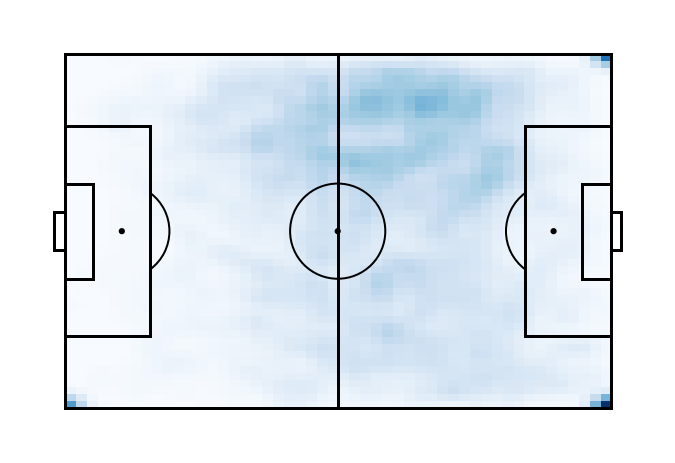

<AxesSubplot:>

time: 136 ms (started: 2021-08-25 10:10:54 +02:00)


In [53]:
# Ball Receipt- heatmap

import matplotsoccer

x=LM['Start_x']
y=LM['Start_y']
hm = matplotsoccer.count(x,y,n=25,m=25) # Construct a 25x25 heatmap from x,y-coordinates
hm = scipy.ndimage.gaussian_filter(hm,1) # blur the heatmap
matplotsoccer.heatmap(hm) # plot the heatmap

In [128]:
# Identifying the Previous "5 players involved in actions"

background = "#030E21"

# For Horizontal View #
fig, ax = plt.subplots(figsize=(11, 7))

fig.set_facecolor(background)

draw_pitch(orientation="h",
           aspect="full",
           pitch_color=background, 
           line_color="w",
           ax=ax)

x = ST_final.Final_x.values
y = ST_final.Final_y.values
Player = ST_final['Player°'].values


plt.scatter(x,y,color="w",edgecolors="w",zorder=12,alpha=1)

plt.title("Domaines d'intervention de l'action (Carry,Pass,Dribble)- 5 actions avant de Tiré sur la cible",fontsize=18,color="w",fontweight="bold")
fig.text(0.44,0.02,'Direction de jeu ---->',fontweight="bold", fontsize=15, color="w") ###change


plt.tight_layout()
plt.show()

time: 190 ms (started: 2021-08-26 16:20:23 +02:00)


In [ ]:
check=df2[df2.team=='Dinamo Zagreb'].reset_index(drop=True)
match_ids=check.match_id.unique()

In [ ]:
for i, txt in enumerate(xe):

     ## Standard move right option value

    t1= [ax.annotate(txt, (xe[i], ye[i]),xytext=(xe[i], ye[i]),color='white', size=10,zorder=5,
                            bbox=dict(facecolor='black', edgecolor='black', pad=1))]